In [1]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_categorical_dtype
from pandas.api.types import is_numeric_dtype
#https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
df = pd.read_csv("winequality-red.csv")

# 1.- Entendimiento del negocio

In [3]:
list(df.columns.values)

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']




* fixed_acidity(Tartaric acid): compuesto por acidos no volatiles o fijo, es decir que no se evaporan facilmente. Este es uno de los acidos que intervienen en el sabor del vino. Un alto nivel de acido tartarico es indicador que el vino es inestable (algunos acidos son :tartaric, malic, citric, and succinic).
*   volatile_acidity: Es la cantidad de acido acetico en el vino, en cantidades muy altas puede ocacionar un sabor similar a vinagre, lo que lo hace desagradable.
* citric_acid: Agrega frescura y sabor al vino.
* residual_sugar: Es el azucar que queda en el vino luego de la fermentanción. La cantidad de esta afecta en el dulzor del vino, estos valores estan linqueados con etiquetas, por ejemplo un vino que contiene mas de 45 g/l es conocido como vino dulce
* chlorides: La cantidad de sal en el vino (salt chloride).Esto puede contribuir positivamente o negativamente en la calidad del vino, dependiendo su su valor es bajo o alto respectivamente.
* free_sulfur_dioxide: previene la aparicion de microbios o la oxidación del vino. Se utiliza esta variable mas la ph, para determinar cuanto SO2(sulfuro de dioxido) hay en el vino para encontrar cuanto protege al vino de oxidarse y malograrse.
*total_sulfur_dioxide: es la cantidad de SO2 que se encuentra en el vino más la porcion que se encuentra linqueada con otros quimicos en el vino.
*density: la densidad del agua es cercana a la dependencia del porcentaje de alchool y azucar que contiene el vino.
*ph: Es la escala que mide la concentración de iones de hidrogeno en el vino. Tiene una relación directa con los acidos, debido a que a más fuerte sea el acido, más iones de hidrogeno habra en el vino, por lo que se podría decir que es una medida de la fierza del acido. En este dastaset los valores de ph describen que tan acido o basico es el vino. Siendo  0 muy acido y 14 muy basico
*sulphates: es un compuesto qumico que se forma en la fermentación del vino, este tambien es agregado por los que hacen el vino para proteger y perservsar el sabor y color del vino.
*alcohol: Nivel de alcohol en el vino
*quality: calidad del vino








In [4]:
# Descripción Inicial de los Datos
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Se puede observa que que va a ser necesario estandarizar las variables, debido a que los promedios de las variables, al compararlos entre ellos tienen un rango de diferencia muy alto. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


podemos observar que el dataset contiene 12 variables, las cuales 11 de ellas son float y una entera. Asi mismo se observa que no hay nulos en el dataset.

#2.- Hipotesis


1. Se obtendra una ligera variación entre los clusters obtenidos con datos estandarizados con respecto a los datos normalizados, utilizando las variables total_acidity y sulphates
2.   La variable free_sulphur dioxide y ph obtendran una clusterización diferente con el clustering elegido de la hipotesis 1
3.  El cluster aglomerativo, k-means y DBSCAN Clustering utilizaran  números similares de clusters, en los experimentos realzados en la hipotesis 1

4. DBSCAN Clustering realizara un mejor agrupamiento con  los datos que no han sido tratados por outlier, que con los que si han sido tratados.
5. Se espera que al momento de realizar el clustering las variables total_acidity y sulphates tengan una relación inversa, debido a que mientras mas total_acidity haya, no se tedra un buen sabor en el vino, y mientras más sulphates haya en el vino mejor se conservara el color, el olor y sabor.



#3.- Automatización de la Exploración de Datos

In [6]:
#ver valores que contiene cada variable
for col in df:
    print(col + ":" + str(df[col].nunique()))


fixed_acidity:96
volatile_acidity:143
citric_acid:80
residual_sugar:91
chlorides:153
free_sulfur_dioxide:60
total_sulfur_dioxide:144
density:436
pH:89
sulphates:96
alcohol:65
quality:6


se puede observar que quality solo tiene seis valores y este indica la calidad del vino, por lo que se cobvertira a categorica

In [7]:
#convirtiendo quality a categorica
df['quality'] = df['quality'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1599 non-null   float64 
 1   volatile_acidity      1599 non-null   float64 
 2   citric_acid           1599 non-null   float64 
 3   residual_sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free_sulfur_dioxide   1599 non-null   float64 
 6   total_sulfur_dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


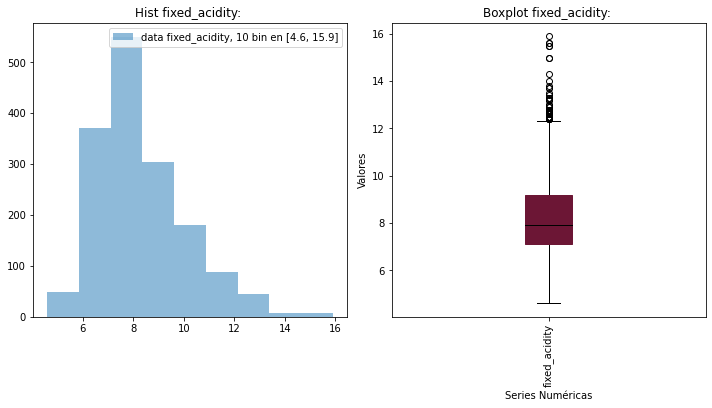

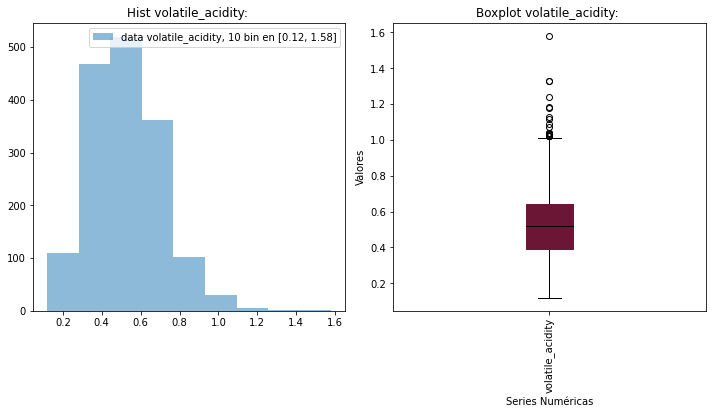

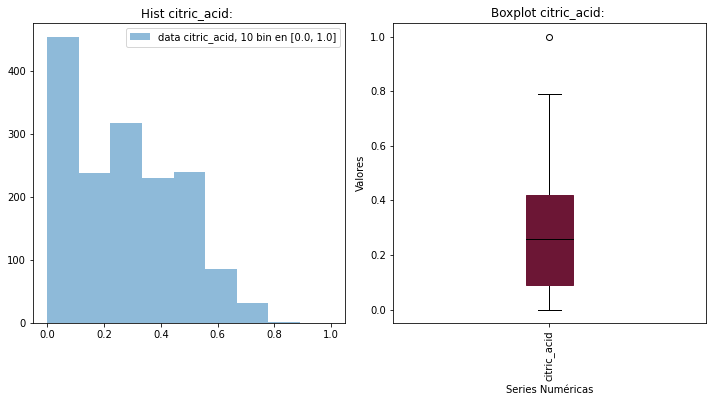

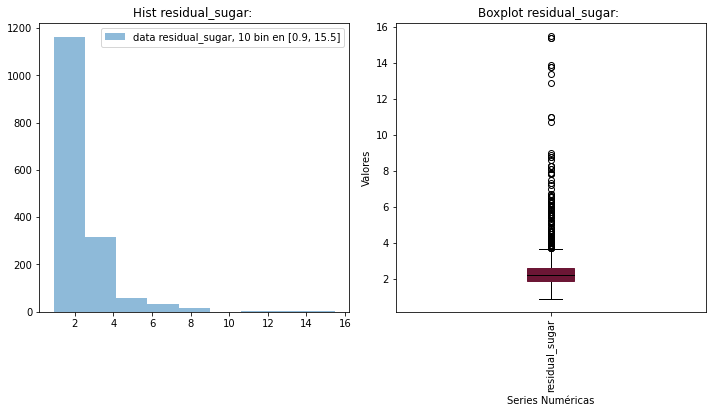

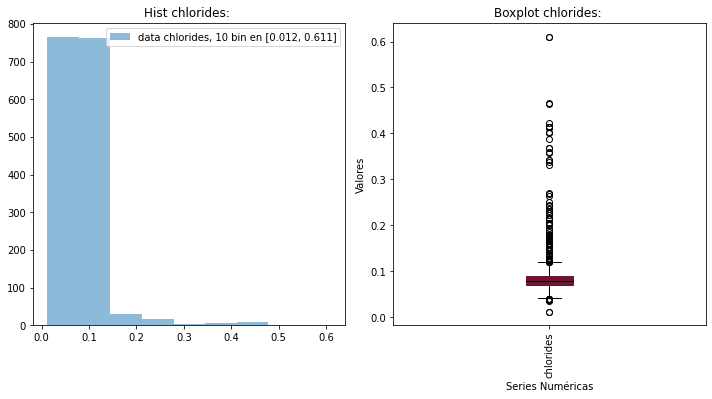

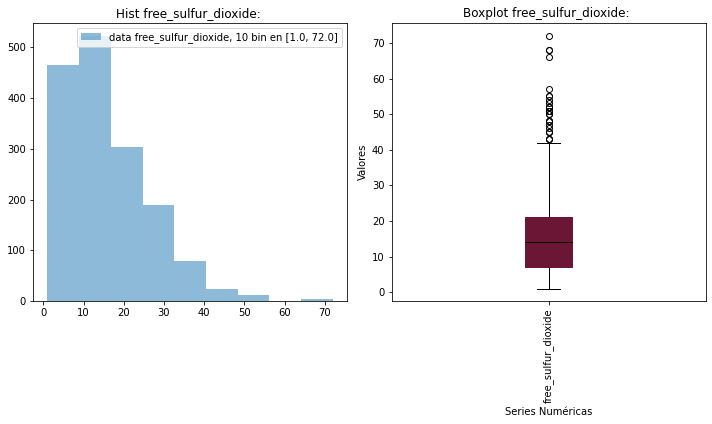

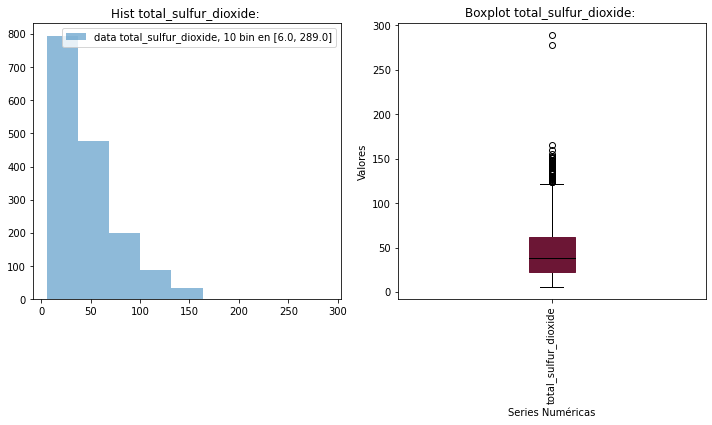

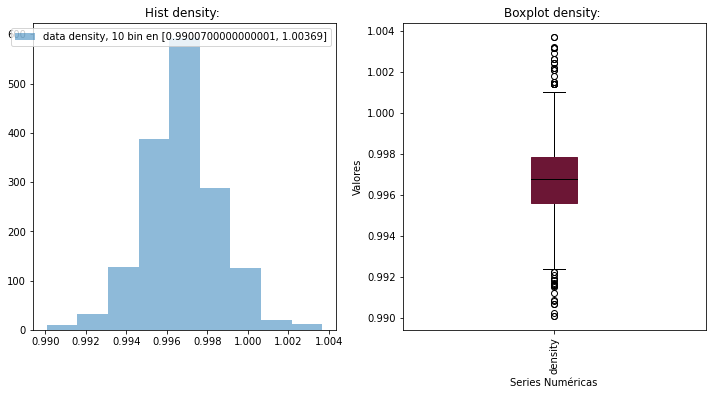

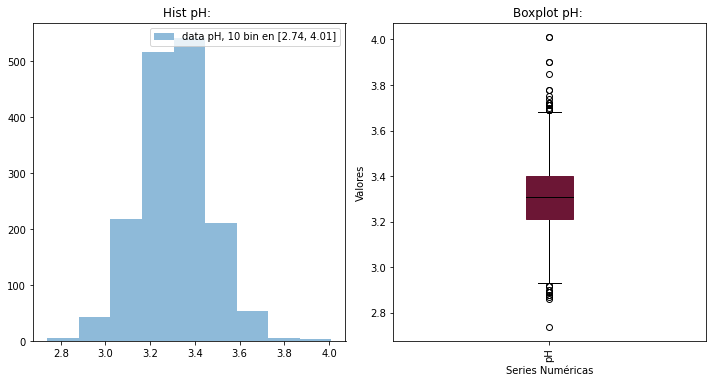

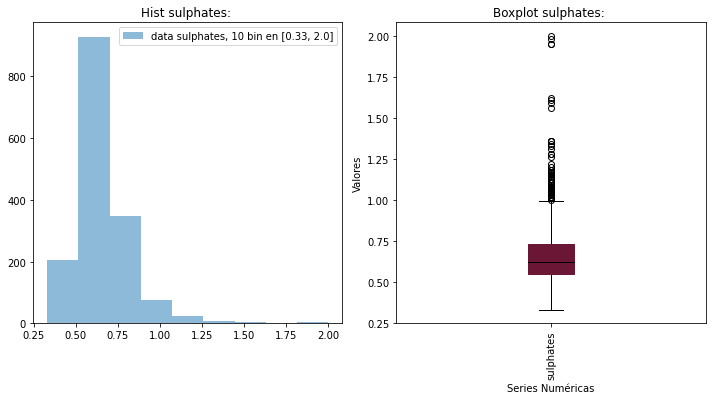

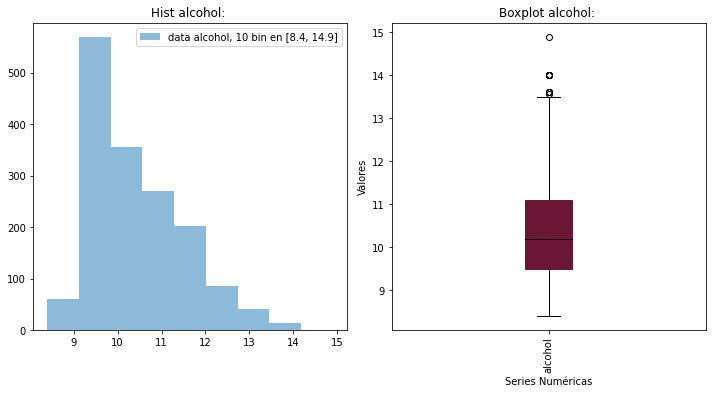

Reporte Tabla quality: 
         quality
quality         
3             10
4             53
5            681
6            638
7            199
8             18
  
Reporte Grafico quality: 


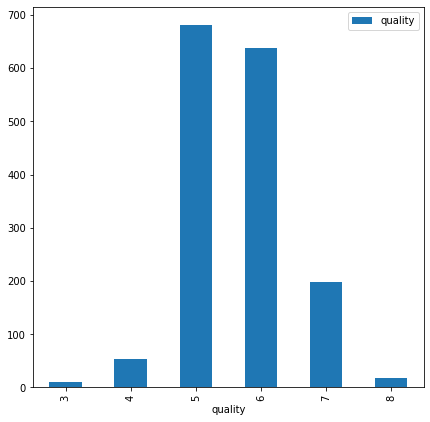

In [8]:
##funcion para automatizar la vista de las variables    
plt.rc('figure', figsize = (10, 10))
for col in df:
    if(is_categorical_dtype(df[col]) == True):
      plt.rc('figure', figsize = (7, 7))
      print("Reporte Tabla "+ col + ": ")
      report = pd.DataFrame(df.groupby(col).agg({col: 'count'}))
      print(report)
      print("  ")
      print("Reporte Grafico "+ col + ": ")
      report.plot.bar()
    else:
      plt.rc('figure', figsize = (10, 10))
      #obtenr max y min
      max = df[col].max()
      min = df[col].min()

      esp = np.linspace(min, max, 10)
      plt.subplot(2, 2, 1)
      plt.title("Hist "+ col + ": ")
      plt.hist(x = df[col], 
         bins = esp,
         alpha = 0.5,
         label = 'data ' + col +', 10 bin en ['+ str(min) +', '+ str(max)+ ']')
      plt.tight_layout()
      plt.legend(loc='best')
      plt.subplot(2, 2, 2)
      plt.title("Boxplot "+ col + ": ")
      plt.boxplot(x = df[col],
           patch_artist = True,
           medianprops = {'color': '#000000'},
           # Propiedades de la caja
           boxprops = {'color': '#6C1635', 'facecolor': '#6C1635'},
           # Propiedades de los bigotes
           whiskerprops = {'color': '#000000'},
           # Propiedades de los límites de los bigotes
           capprops = {'color': '#000000'},
           vert = True)
      plt.xticks([1], [col], rotation=90)
      plt.ylabel('Valores')
      plt.xlabel('Series Numéricas')
      plt.tight_layout()
      plt.show()
plt.rc('figure', figsize = (10, 10))


Como se puede observar que los graficos las variables poseen valores atipicos sobretodo las variables: 
* fixed_acidity
* volatile_acidity
* residual_sugar
* chlorides
* free_sulfur_dioxide
* total_sulfur_dioxide
* density
* pH
* sulphates
* alcohol
* quality

Una de las formas a tratar es cambiando los valores atipicos por los percentiles en las variables númericas, en la variable categorica se crearan nuevas clases para evitar que existan pocas instancias por cada clase.



# 4.- Tratamineto de la información:

## Tratamiento Varaible Categorica

In [9]:
#copia de dataframe
df_wine = df.copy()


Como se observo en el grafico quality tiene pocos valores 3,4, 7 y 8; lo que podría ocasionar que haya errores al momento de realizar la clusterizacion o utilizar la variable dentro de un modelo. Por lo que se craran 3 clases, en donde se uniran las qualities : 3,4,5 y las clases 7, 8. Se pondran los valores 1, 2, 3 a las clases formadas. Para poder realizar el cambio se transformara la variable de nuevo a int.

In [10]:
df_wine['quality'] = df_wine['quality'].astype('int')

In [11]:
#Creacion de nuevas categorias
df_wine['newQuality'] = 0
df_wine['newQuality'][df_wine['quality'] < 6] = 1 #baja calidad#
df_wine['newQuality'][df_wine['quality'] == 6] = 2 #calidad media
df_wine['newQuality'][df_wine['quality'] > 6] = 3 #callidad alta

df_wine

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,newQuality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
     [('one_hot_encoder', OneHotEncoder(categories = 'auto'), [12])], # Aplique la codificación sobre la columna indicada
     remainder = 'passthrough'
)


In [13]:
# Auxiliar 1: Rescatar los índices
# Necesitamos nombrar a las dummies que se crean
# Auxiliar 1: Rescatar los índices
# Necesitamos nombrar a las dummies que se crean

df_wineCat = pd.DataFrame(ct.fit_transform(df_wine), columns = ['flg_quality_1', 'flg_quality_2', 'flg_quality_3'] + list(df_wine.columns)[0:-1] )
df_wineCat

,flg_quality_1,flg_quality_2,flg_quality_3,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.0,0.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,1.0,0.0,0.0,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,1.0,0.0,0.0,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,0.0,1.0,0.0,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,1.0,0.0,0.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,0.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,0.0,1.0,0.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,0.0,1.0,0.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,1.0,0.0,0.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [14]:
df_wineCat.drop('flg_quality_3', axis=1, inplace= True)
df_wineCat

,flg_quality_1,flg_quality_2,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1.0,0.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,1.0,0.0,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,1.0,0.0,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,0.0,1.0,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,1.0,0.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,0.0,1.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,0.0,1.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,1.0,0.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [15]:
#se realiza esta unio ya que se realizara un cluster comparando la quality con la new quality
df_wine = pd.concat([df_wineCat, pd.DataFrame(df_wine['newQuality'])], axis=1)
df_wine

,flg_quality_1,flg_quality_2,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,newQuality
0,1.0,0.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,1
1,1.0,0.0,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,1
2,1.0,0.0,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,1
3,0.0,1.0,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,2
4,1.0,0.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,1
1595,0.0,1.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,2
1596,0.0,1.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,2
1597,1.0,0.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,1


## Creación de nuevas variables

In [16]:
#Segun la teroia la acidity total de un vino es sumar todos los tipos de acidity, no se toma en cuenta el citric_acidity
#porque se menciona que el fixed_acidity esta compuesto por acidos citricos, por lo que se quiso evitar sumar un mismo valor y por eso no se tomo  encuenta.
df_wine['total_acidity'] =df_wine['fixed_acidity']  + df_wine['volatile_acidity'] 
df_wine

,flg_quality_1,flg_quality_2,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,newQuality,total_acidity
0,1.0,0.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,1,8.100
1,1.0,0.0,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,1,8.680
2,1.0,0.0,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,1,8.560
3,0.0,1.0,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,2,11.480
4,1.0,0.0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,1,8.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,1,6.800
1595,0.0,1.0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,2,6.450
1596,0.0,1.0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,2,6.810
1597,1.0,0.0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,1,6.545


In [17]:
#dataset para realizar experimentos, sin obtener nuevas columnas obtenidas de estos
df_wineBackUp = df_wine

Se creo la variable total acidity debido a que mientras se investigaba la definición de cada una de las variables, se encontro que se puede obtener el total de acido del vino si se suman ambos tipos de acidity, no se tomo en cuenta el citric_acidity, debido a que se encontro que fixed_acidity esta compuesto por los acidos citricos, por lo cual para evitar que se sume un valor que ya se esta tomando en cuenta de discrimino esta variable para la creación de esta variable

# 5.-Tratamineto de outliers

Se observaran todas las variables para ver si sera necesario realizar un tratamiento a los outliers:
* fixed_acidity
*citric_acid
* volatile_acidity
* residual_sugar
* chlorides
* free_sulfur_dioxide
* total_sulfur_dioxide
* density
* pH
* sulphates
* alcohol
* total acidity

contaban con valores outliers, por lo que se inputaran los percentiles en dichos valores, para evitar algun problema al momento de clusterizar. Se decidio no borrar las instancias con outliers para evitar demasiada perdida de información.

In [18]:
df_wineTratOut = df_wine.copy()

In [19]:
#para los valores outliers menores a se llenaran con dicho valor y para los que son mayores se llenaran con dicho valor
q1 = df_wineTratOut['fixed_acidity'].quantile(0.25)
print("primer cuartil: ", q1)

q3 = df_wineTratOut['fixed_acidity'].quantile(0.75)
print("tercer cuartil: ", q3)
iqr = q3 - q1
print("rango intercualtilico: ", iqr)

max = df_wineTratOut['fixed_acidity'].max()
print("valor maximo: ",max)
min = df_wineTratOut['fixed_acidity'].min()
print("valor minimo ", min)



primer cuartil:  7.1
tercer cuartil:  9.2
rango intercualtilico:  2.0999999999999996
valor maximo:  15.9
valor minimo  4.6


In [20]:
bi_calculado = (q1 - 1.5 * iqr)
print("BI Calculado: ",bi_calculado )
bs_calculado = (q3 + 1.5 * iqr)
print("Bs Calculado: ",round(bs_calculado,2) )

BI Calculado:  3.95
Bs Calculado:  12.35


In [21]:
#transformando outliers
#ubicacion de valores menores al bigote inferior calculado
ubicacionOutliersBI = (df_wineTratOut['fixed_acidity'] < bi_calculado)
#ubicacion de valores mayores al bigote superior calculado
ubicacionOutliersBS = (df_wineTratOut['fixed_acidity'] > bs_calculado)

In [22]:
#para evitar la transformacion de los quality se transformaran a categorical
df_wineTratOut['flg_quality_1'] = df_wineTratOut['flg_quality_1'].astype('category')
df_wineTratOut['flg_quality_2'] = df_wineTratOut['flg_quality_2'].astype('category')
df_wineTratOut['quality'] = df_wineTratOut['quality'].astype('category')
df_wineTratOut['newQuality'] = df_wineTratOut['newQuality'].astype('category')
df_wineTratOut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   flg_quality_1         1599 non-null   category
 1   flg_quality_2         1599 non-null   category
 2   fixed_acidity         1599 non-null   float64 
 3   volatile_acidity      1599 non-null   float64 
 4   citric_acid           1599 non-null   float64 
 5   residual_sugar        1599 non-null   float64 
 6   chlorides             1599 non-null   float64 
 7   free_sulfur_dioxide   1599 non-null   float64 
 8   total_sulfur_dioxide  1599 non-null   float64 
 9   density               1599 non-null   float64 
 10  pH                    1599 non-null   float64 
 11  sulphates             1599 non-null   float64 
 12  alcohol               1599 non-null   float64 
 13  quality               1599 non-null   category
 14  newQuality            1599 non-null   category
 15  tota

In [23]:
###automatizacion de inputacion de outliers, se discrimina las categoricas debido a que ya fueoron tratadas
for col in df_wineTratOut:
    if(is_categorical_dtype(df_wineTratOut[col]) == False):
      q1 = df_wineTratOut[col].quantile(0.25)
      q3 = df_wineTratOut[col].quantile(0.75)
      iqr = q3 - q1
      bi_calculado = (q1 - 1.5 * iqr)
      bs_calculado = (q3 + 1.5 * iqr)
      df_wineTratOut[col] < bi_calculado
      df_wineTratOut[col][df_wineTratOut[col] < bi_calculado] = round(bi_calculado,2)
      df_wineTratOut[col][df_wineTratOut[col] > bs_calculado] = round(bs_calculado,2)

q1 = df_wineTratOut['fixed_acidity'].quantile(0.25)
print("primer cuartil: ", q1)

q3 = df_wineTratOut['fixed_acidity'].quantile(0.75)
print("tercer cuartil: ", q3)
iqr = q3 - q1
bi_calculado = (q1 - 1.5 * iqr)
print("BI Calculado: ",bi_calculado )
bs_calculado = (q3 + 1.5 * iqr)
print("Bs Calculado: ",round(bs_calculado,2) )

primer cuartil:  7.1
tercer cuartil:  9.2
BI Calculado:  3.95
Bs Calculado:  12.35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
#Comprobación de la transformación
df_wineTratOut['fixed_acidity'].max()
#como se puede observar luego de la transformación el valor maximo se volvio el bs calculado, en vez de 15 como estaba anrteriormente

12.35

Se decidio realizar el tratamiento de los outliers, para que los resultados obtenidos sean lo mas precisos posibles y los resultados no se vean afectados por los outliers. Más como se menciono en las hipotesis 4 se realizara una comparación entre el dataframe con tratamiento de outliers y otro sin dicho tratamiento para observar con cual de los dos se obtiene un mejor resultado, utilizando el DBSCAN.

Para llenar los outlier se utilizo los valores de bigote inferior(bi) o bigote superior(bs) calculado dependiendo si eran menores a bi calculado o bs calculado respectivamente, esto se realizo para evitar variar mucho el valor que indicaba anteriormente, asi como, cambiar la distribución de los datos. 

Se realizo una transofrmación de los outliers, debido a que siempre va a seguir existiendo outliers, y si se sigue transformado corremos con el peligro de perder información. 

# 6.- Estandarización de las variables

In [25]:
# Estandarización
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_wine_std = pd.DataFrame(sc.fit_transform(df_wineTratOut), columns = list(df_wineTratOut.columns))
df_wine_std

,flg_quality_1,flg_quality_2,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,newQuality,total_acidity
0,1.072004,-0.814796,-0.538197,0.996290,-1.392598,-0.693182,-0.291550,-0.476813,-0.385806,0.594649,1.333891,-0.655496,-0.966950,-0.787823,-0.955427,-0.444323
1,1.072004,-0.814796,-0.296555,2.029835,-1.392598,0.455672,0.943237,0.946759,0.700988,0.056434,-0.736164,0.220142,-0.587615,-0.787823,-0.955427,-0.086171
2,1.072004,-0.814796,-0.296555,1.340805,-1.186987,-0.036694,0.606477,-0.070078,0.272857,0.164077,-0.335509,0.001232,-0.587615,-0.787823,-0.955427,-0.160271
3,-0.932832,1.227302,1.757401,-1.415317,1.485952,-0.693182,-0.347676,0.133289,0.470456,0.702292,-1.003268,-0.509557,-0.587615,0.450848,0.469692,1.642839
4,1.072004,-0.814796,-0.538197,0.996290,-1.392598,-0.693182,-0.291550,-0.476813,-0.385806,0.594649,1.333891,-0.655496,-0.966950,-0.787823,-0.955427,-0.444323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.072004,-0.814796,-1.263123,0.422098,-0.981376,-0.529060,0.494223,1.658544,-0.056475,-0.966175,0.933235,-0.509557,0.076221,-0.787823,-0.955427,-1.247077
1595,-0.932832,1.227302,-1.444355,0.135002,-0.878571,-0.200816,-1.077323,2.370330,0.174058,-0.847768,1.400667,0.803900,0.740057,0.450848,0.469692,-1.463203
1596,-0.932832,1.227302,-1.202713,-0.094675,-0.724363,-0.036694,-0.291550,1.353493,-0.188207,-0.514075,0.732907,0.730930,0.550389,0.450848,0.469692,-1.240902
1597,1.072004,-0.814796,-1.444355,0.680484,-0.775766,-0.529060,-0.347676,1.658544,-0.056475,-0.659393,1.734547,0.439051,-0.208280,-0.787823,-0.955427,-1.404541


In [26]:
# Normalización -> Operando sobre las columnas
from sklearn.preprocessing import MinMaxScaler
nm = MinMaxScaler()
df_wine_nrm = pd.DataFrame(nm.fit_transform(df_wineTratOut), columns = list(df_wineTratOut.columns))
df_wine_nrm

,flg_quality_1,flg_quality_2,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,newQuality,total_acidity
0,1.0,0.0,0.361290,0.644444,0.000000,0.363636,0.4500,0.243902,0.241379,0.709091,0.776316,0.343284,0.196078,0.4,0.0,0.386511
1,1.0,0.0,0.412903,0.844444,0.000000,0.618182,0.7250,0.585366,0.525862,0.618182,0.368421,0.522388,0.274510,0.4,0.0,0.461738
2,1.0,0.0,0.412903,0.711111,0.043956,0.509091,0.6500,0.341463,0.413793,0.636364,0.447368,0.477612,0.274510,0.4,0.0,0.446174
3,0.0,1.0,0.851613,0.177778,0.615385,0.363636,0.4375,0.390244,0.465517,0.727273,0.315789,0.373134,0.274510,0.6,0.5,0.824903
4,1.0,0.0,0.361290,0.644444,0.000000,0.363636,0.4500,0.243902,0.241379,0.709091,0.776316,0.343284,0.196078,0.4,0.0,0.386511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,0.206452,0.533333,0.087912,0.400000,0.6250,0.756098,0.327586,0.445455,0.697368,0.373134,0.411765,0.4,0.0,0.217899
1595,0.0,1.0,0.167742,0.477778,0.109890,0.472727,0.2750,0.926829,0.387931,0.465455,0.789474,0.641791,0.549020,0.6,0.5,0.172503
1596,0.0,1.0,0.219355,0.433333,0.142857,0.509091,0.4500,0.682927,0.293103,0.521818,0.657895,0.626866,0.509804,0.6,0.5,0.219196
1597,1.0,0.0,0.167742,0.583333,0.131868,0.400000,0.4375,0.756098,0.327586,0.497273,0.855263,0.567164,0.352941,0.4,0.0,0.184825


Se decidio no realizar la discretización debido a que hay muchos valores los cuales al volverlos enteros se volverian cero, lo cual provocaria perdida ce información, ya que los muchos de dichos valores son importantes para indicar si un vino sera muy dulce o tendraun mal sabor.

#7.- Clustering

## Introduccion a Agrupamiento basado en dimensiones

El agrupamiento basado en dimensiones conecta areas de alta densidad en clusters, lo que significa que este algoritmo es muy eficiente en encontrar regiones con alta densidad y valores atipicos. Con áreas de alta densidad, nos referimos a las areas en donde los puntos estan concentrados.

Este tipo de clustering permite data con distribuciones arbitarias siempre y cuanda las areas en donde los puntos esten concentrados puedan ser conectadas. Más sufrira dificultades si la data contiene densidades variadas y altas dimensiones. Cabe recalcar que este algoritmo, no asignara los outliers a los clusters.

En resumen realiza cluster en regiones densas de puntos, separadas por regiones poco densas de otras regiones que tienen alta densidad.

Las principales caracteristicas de este tipo de clusters son: 


*   Identifican clusters que poseen formas arbitarias
*   Son robustos ante la presencia de ruido, es decir no tiene problema al trabajar con outliers.
*  Son escalables : Solo necesita un recorrido del conjunto de datos


Un algoritmo que pertenece a este tipo de clustering es el DBSCAN Clustering, el cual se explicara a continuación.

Ejemplo de Agrupamiento basado en dimensiones

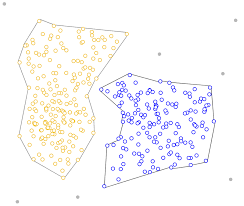

## Introduccion a DBSCAN Clustering

Agrupamiento espacial basado en densidad o tambien conocido por las siglas de DBSCAN Clustering, inicialmente este algoritmo fue propuesto para realizar agrupamientos de data espacial, más este se volvio rapidamente popular para aplicarlo en diferentes tipos de datasets. 

Es un algoritmo el cual puede encontrar agrupamientos con forma arbitaria y que poseen ruido. Este algoritmo agrupa los puntos en un cluster, solo si este es cercano a varios puntos de ese cluster.  Además, aparte de agrupar la data en clusters de diferentes formas(como se menciono anteriormente), este algoritmo es rapido cuando agrupa dataset de longitud pequeña o mediana. La complejidad de este algoritmo es O(n·log(n)). La parte que demora mas en este algoritmo es el calculo de la similaridad entre los objetes de la data, ya que el agrupamiento requiere una sola recorrida al set de datos.


A diferencia del algoritmo aglomerativo y k-means, DBSCAN no necesita que se le ingrese el número de clusters como parametro, ya que este los infiere basandose en el set de datos ingresado. Más tiene dos parámetros importantes el Eps, y el MinPts.



*  Eps: La distancia que especifica si dos puntos son vecinos o no. Para que esto suceda la distancia entre los dos puntos debe ser menor o igual al valor del eps.
*   MinPts: mínimo número de puntos que definen un cluster.


Luego de la clusterización, se obtienen 3 tipos de puntos:


1.   Punto central (central point): Se clasifica punto central a los puntos que en su area circundante con radio eps existen un número mínimo de puntos (m) (incluido el punto en sí)
2.   Punto fronterizo (Border point): Es un punto que al menos tiene un punto central a una distancia n.
3.  Valor atípico (Noise point) :  Se considera valor atipico a los puntos que no son puntos centrales y que no son accesibles desde ningun punto central



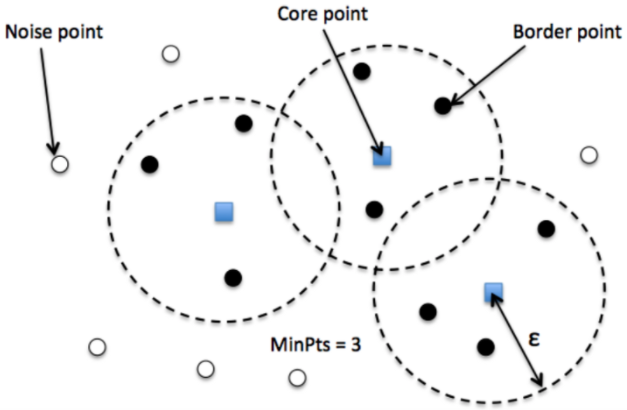

Pasos del algoritmo


1.   Determinar el valor de Minpts
2.   Determinar el valor del eps
3.   Se selecciona un punto de inicio aleatoriamente y su area de vecinos es seleccionada atravez del valor del eps. Si hay un por lo menos una cantidad de puntos igual al valor del minPts, el punto es marcado como punto central y la formación del clustering comienza. Caso contrario, el punto es marcado como outlier.
4. Cuando el agrupamiento comienza (cluster X), todos los puntos en el área de vecinos del punto central, pasan a formar parte del cluster x, si los puntos agregados tambien son puntos centrales, los puntos que forman parte de su area de vecionos (de los puntos recientemente agregados al cluster X), pasan a formar parte del cluster X.
5. El siguiente paso es seleccionar otro punto , de los cuales no han sido visitados en los anteriores pasos. Y se vuelve a repetir el procedimiento mencionado del punto 3 y 4.
6. **STOP** : Cuando todos los puntos han sido visistados

Cabe recalcar que un punto que fue marcado como outlier, puede volver a ser revisado y formar parte de un cluster.

## Obtener valores de MinPts y Eps

MinPts, segun el articulo de investigación de Sander, et al(1996) [referencia 12] y el blog de Tara Mulin [referencia 13], indican que para datasets de dos dimensiones es recomendable utilizar un valor de 4, debido que poner mayor valor no se obtiene una diferencia significativa, Más si el dataset es de más dimensiones es recomendable utlizar la formula 2*NumDimensiones.(Sander et al, 1998)(tara Murin, referencia 13)

El valor del Eps, se calcula luego de obtener el valor de MinPts. La tecnica consiste en calcular la distancia promedio entra un punto y sus k neighbors, don de k tiene el valor de MinPts. Las distancias promedios, luego son ploteadas de forma acendente, en un grafico de distancias k. Se seleccionara el valor de la maxima curvatura como Eps



## Desarrollo

### Hipotesis 1: Se obtendra una ligera variación entre los clusters obtenidos con datos estandarizados con respecto a los datos normalizados, utilizando las variables total_acidity y sulphates

Se seleccionaron dichas variables, debido a que segun la literatura revisada ambas son variables importantes que intervienen en el sabor del vino, caracteristica muy importante al momento de consumirlo. Así mismo, según se observa la literatura revidada, estas dos variables tienen una relación inversa, a más aciditidad exista en el vino este tengra un sabor mas agrio y mientras mas sulphates tenga este conservara su color y su sabor por mas tiempo. Por esa razon se decidio seleccionar dichas variables para observar si ambas tienen este tipo de relación en el dataset brindado.

#### Datos normalizados

In [28]:
input_cl = df_wine_nrm[['total_acidity',	'sulphates']]

In [29]:
plt.rc('figure', figsize = (10, 10))

##### Clustering Aglomerativo

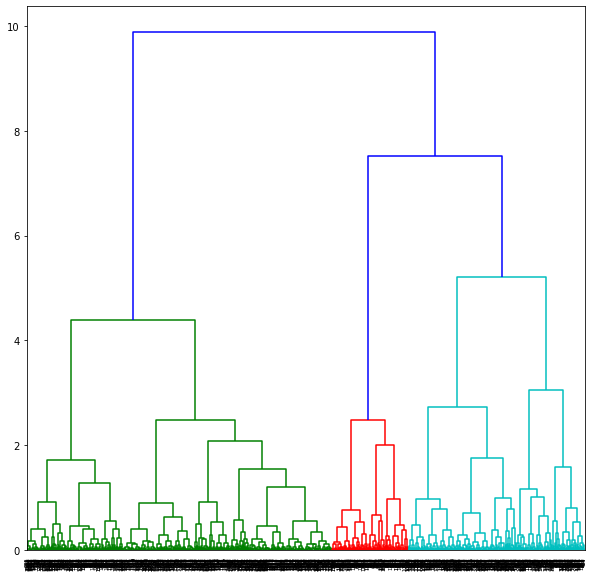

In [30]:
import scipy.cluster.hierarchy as sch
dendrog = sch.dendrogram(sch.linkage(input_cl, method = 'ward', metric = 'euclidean'))
#se selecciono estas metricas por facilidad del clustering

Observando el dendograma podemos observar dos posibles distancias más largas pueden ser la linea azul del extremo izquierdo (base en la line verde) y la linea con base en la linea roja. Observando mejor la distancia mas larga es la de la base verde. Oteniendo la linea superior y la base más proxima, se puede observar que el número optimo de clusters es 2.

In [31]:
plt.rc('figure', figsize = (5, 5))

In [32]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2, linkage = 'ward', affinity = 'euclidean')

agg_cl_rnm = ac.fit_predict(input_cl)
agg_cl_rnm
#ward: misminiza la varianza de los clusterings que se agrupan
#euclidean: como estamos utilizando ward, solo el valor euclidean es aceptado

array([1, 0, 1, ..., 0, 0, 0])

In [33]:
aux_cl_rnm = pd.DataFrame(agg_cl_rnm, columns = ['cl_agg_rnm'], index = input_cl.index)
aux_cl_rnm

,cl_agg_rnm
0,1
1,0
2,1
3,0
4,1
...,...
1594,1
1595,0
1596,0
1597,0


In [34]:
df_wine_clust_nrm = pd.concat([df_wine_nrm, aux_cl_rnm], axis=1)

In [35]:
#observamos si hay vacios
df_wine_clust_nrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flg_quality_1         1599 non-null   float64
 1   flg_quality_2         1599 non-null   float64
 2   fixed_acidity         1599 non-null   float64
 3   volatile_acidity      1599 non-null   float64
 4   citric_acid           1599 non-null   float64
 5   residual_sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free_sulfur_dioxide   1599 non-null   float64
 8   total_sulfur_dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality               1599 non-null   float64
 14  newQuality            1599 non-null   float64
 15  total_acidity        

In [36]:
plt.rc('figure', figsize = (7, 7))

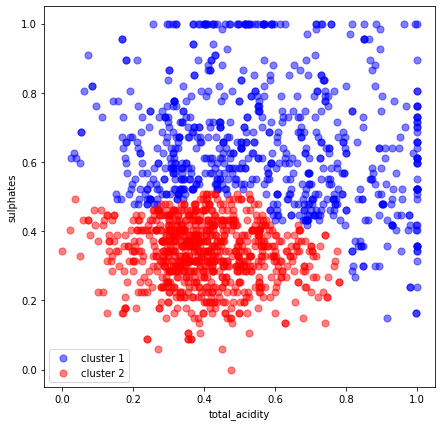

In [37]:
# Observar la naturaleza de las agrupaciones aglomerativas con la data normalizada
plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm'] == 0]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm'] == 0]['sulphates'],
            c = 'b', label = 'cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm'] == 1]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm'] == 1]['sulphates'],
            c = 'r', label = 'cluster 2',
            alpha = 0.5, s = 50)

plt.xlabel('total_acidity')
plt.ylabel('sulphates')
plt.legend(loc = 'best')

plt.show()

Con solo observar la imagen, se puede decir que no se ha realizado una buena clusterización, debido a que entre ellos tienen características en comun y no tienen mucha distancia entre ellos. Se observara, el mismo caso pero utilizando 3 cluster, para observar su comportamiento. Se selecciona 3 clusters, debido a que este es el valor que se utilizaría si se hubiera seleccionado la linea azul con base en la linea rojo del dendograma. Más si se observa por la derecha los valores inferiores azules, se puede ve que estan un poco separados del azul.

In [38]:
from sklearn.cluster import AgglomerativeClustering
ac_2 = AgglomerativeClustering(n_clusters = 3, linkage = 'ward', affinity = 'euclidean')

agg_cl_rnm_2 = ac_2.fit_predict(input_cl)
agg_cl_rnm_2

array([1, 0, 1, ..., 0, 0, 0])

In [39]:
aux_cl_rnm_2 = pd.DataFrame(agg_cl_rnm_2, columns = ['cl_agg_rnm_2'], index = input_cl.index)
aux_cl_rnm_2

,cl_agg_rnm_2
0,1
1,0
2,1
3,2
4,1
...,...
1594,1
1595,0
1596,0
1597,0


In [40]:
df_wine_clust_nrm = pd.concat([df_wine_clust_nrm, aux_cl_rnm_2], axis=1)

In [41]:
df_wine_clust_nrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flg_quality_1         1599 non-null   float64
 1   flg_quality_2         1599 non-null   float64
 2   fixed_acidity         1599 non-null   float64
 3   volatile_acidity      1599 non-null   float64
 4   citric_acid           1599 non-null   float64
 5   residual_sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free_sulfur_dioxide   1599 non-null   float64
 8   total_sulfur_dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality               1599 non-null   float64
 14  newQuality            1599 non-null   float64
 15  total_acidity        

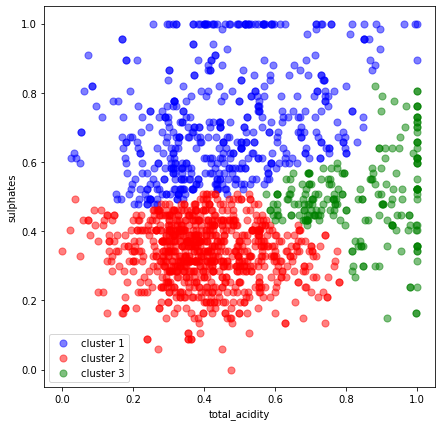

In [42]:
# Observar la naturaleza de las agrupaciones aglomerativas con la data normalizada
plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm_2'] == 0]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm_2'] == 0]['sulphates'],
            c = 'b', label = 'cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm_2'] == 1]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm_2'] == 1]['sulphates'],
            c = 'r', label = 'cluster 2',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm_2'] == 2]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_agg_rnm_2'] == 2]['sulphates'],
            c = 'g', label = 'cluster 3',
            alpha = 0.5, s = 50)

plt.xlabel('total_acidity')
plt.ylabel('sulphates')
plt.legend(loc = 'best')

plt.show()

Como se puede observar,como se esperaba, dichos puntos se agruparon en un cluster. En ambos casos se puede decir, que no cumple por completo la hipotesis 5, es decir no tienen una relacion completamente indirecta, hay pocos puntos que si la cumplen, pero la mayoría posee una relación directa, por lo que con el metodo aglomerativo se rechaza la hipotesis 5. Cuando se tegan los otros cluster, se pasara a observar cual de ellos realizo una mejor clusterización.

##### K-means

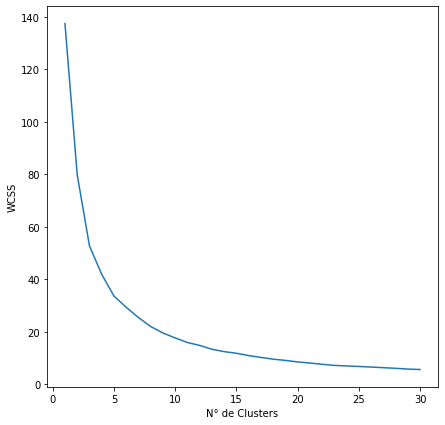

In [43]:
wcss = []
from sklearn.cluster import KMeans
for i in range(1, 31):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(input_cl)
  wcss.append(km.inertia_)
  #print(str(i) + ' ' + str(km.inertia_))
#print(wcss)

# Graficando el Resultdo
plt.plot([*range(1, 31)], # Colocamos el eje X
         wcss) # Colocamos el eje Y
plt.xlabel('N° de Clusters')
plt.ylabel('WCSS')
plt.show()

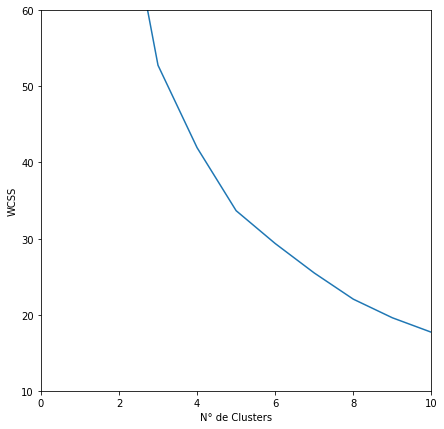

In [44]:
#hacemos zoom al codo
plt.plot([*range(1, 31)], # Colocamos el eje X
         wcss) # Colocamos el eje Y
plt.xlabel('N° de Clusters')
plt.ylabel('WCSS')
plt.xlim(0,10)
plt.ylim(10,60)
plt.show()

Como se puede observar la curva aparece con 5 clusters. Con lo que por el momento rechazamos la hipotesis 3, debido a que el clustering aglomerativo y el k-means utilizan diferentes numeros de clusters, para este caso.

In [45]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km_cl = km.fit_predict(input_cl)
km_cl

array([1, 4, 4, ..., 4, 4, 1], dtype=int32)

In [46]:
df_wine_clust_nrm = pd.concat([df_wine_clust_nrm,
                         pd.DataFrame(km_cl, columns = ['cl_k_mean_rnm'], index = input_cl.index)], axis=1)

In [47]:
df_wine_clust_nrm.info()
#no hay vacios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flg_quality_1         1599 non-null   float64
 1   flg_quality_2         1599 non-null   float64
 2   fixed_acidity         1599 non-null   float64
 3   volatile_acidity      1599 non-null   float64
 4   citric_acid           1599 non-null   float64
 5   residual_sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free_sulfur_dioxide   1599 non-null   float64
 8   total_sulfur_dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality               1599 non-null   float64
 14  newQuality            1599 non-null   float64
 15  total_acidity        

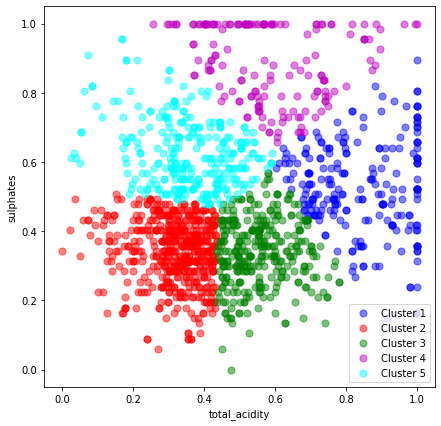

In [48]:
plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 0]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 0]['sulphates'],
            c = 'b', label = 'Cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 1]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 1]['sulphates'],
            c = 'r', label = 'Cluster 2',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 2]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 2]['sulphates'],
            c = 'g', label = 'Cluster 3',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 3]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 3]['sulphates'],
            c = 'm', label = 'Cluster 4',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 4]['total_acidity'],
            y = df_wine_clust_nrm[df_wine_clust_nrm['cl_k_mean_rnm'] == 4]['sulphates'],
            c = 'cyan', label = 'Cluster 5',
            alpha = 0.5, s = 50)

plt.xlabel('total_acidity')
plt.ylabel('sulphates')
plt.legend(loc = 'best')

plt.show()

Como se puede observar los clustering no tienen casi ninguna distancia entre sí,
pero ha diferencia de los de los aglomerativos estos estan más compactos. Por los clusters utilizados en los anteriores experimentos se rechaza la hipotesis 3.

##### Clustering DBSCAN

Como lo menciona la bibliografia, la data tiene 2 dimensiones por lo cual se tomara 4 como valor para MinPts.

In [136]:
df_wine_nrm

,flg_quality_1,flg_quality_2,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,newQuality,total_acidity
0,1.0,0.0,0.361290,0.644444,0.000000,0.363636,0.4500,0.243902,0.241379,0.709091,0.776316,0.343284,0.196078,0.4,0.0,0.386511
1,1.0,0.0,0.412903,0.844444,0.000000,0.618182,0.7250,0.585366,0.525862,0.618182,0.368421,0.522388,0.274510,0.4,0.0,0.461738
2,1.0,0.0,0.412903,0.711111,0.043956,0.509091,0.6500,0.341463,0.413793,0.636364,0.447368,0.477612,0.274510,0.4,0.0,0.446174
3,0.0,1.0,0.851613,0.177778,0.615385,0.363636,0.4375,0.390244,0.465517,0.727273,0.315789,0.373134,0.274510,0.6,0.5,0.824903
4,1.0,0.0,0.361290,0.644444,0.000000,0.363636,0.4500,0.243902,0.241379,0.709091,0.776316,0.343284,0.196078,0.4,0.0,0.386511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,0.206452,0.533333,0.087912,0.400000,0.6250,0.756098,0.327586,0.445455,0.697368,0.373134,0.411765,0.4,0.0,0.217899
1595,0.0,1.0,0.167742,0.477778,0.109890,0.472727,0.2750,0.926829,0.387931,0.465455,0.789474,0.641791,0.549020,0.6,0.5,0.172503
1596,0.0,1.0,0.219355,0.433333,0.142857,0.509091,0.4500,0.682927,0.293103,0.521818,0.657895,0.626866,0.509804,0.6,0.5,0.219196
1597,1.0,0.0,0.167742,0.583333,0.131868,0.400000,0.4375,0.756098,0.327586,0.497273,0.855263,0.567164,0.352941,0.4,0.0,0.184825


In [146]:
df_wine_nrm.ndim

2

In [144]:
#Obtencion del valor Eps
from sklearn.neighbors import NearestNeighbors
#n_neighbors es el valor de tu minPts
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_wine_nrm)
distances, indices = neighbors_fit.kneighbors(df_wine_nrm)


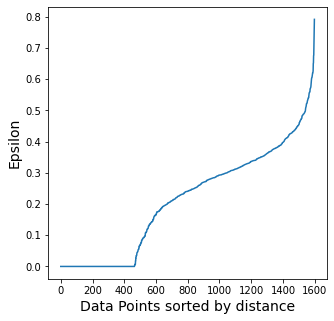

In [145]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.plot(distances)


como podemos observar hen la figura existen casi dos curvas uma para fuera u otra para adentro, hagamos la prueba con ambos valores.
en el primer codo el valor a tomar sera 0.2, y en el segundo 0.5

In [51]:
df_wine_clust_nrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flg_quality_1         1599 non-null   float64
 1   flg_quality_2         1599 non-null   float64
 2   fixed_acidity         1599 non-null   float64
 3   volatile_acidity      1599 non-null   float64
 4   citric_acid           1599 non-null   float64
 5   residual_sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free_sulfur_dioxide   1599 non-null   float64
 8   total_sulfur_dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality               1599 non-null   float64
 14  newQuality            1599 non-null   float64
 15  total_acidity        

In [52]:
from sklearn.cluster import DBSCAN
dbscan_nrm=DBSCAN(eps=0.2,min_samples=4,metric='euclidean')
model = dbscan_nrm.fit_predict(input_cl)

In [53]:
df['dbscan_nrm_labels']=dbscan_nrm.labels_
df['dbscan_nrm_labels'].value_counts()

0    1599
Name: dbscan_nrm_labels, dtype: int64

Con solo viendo el numero de resultados, observamos que no se ha realizado una buena clusterización, esto puede deberse al valor de eps, ya que si revisamos el valor default que le coloca skitlearn a esa variable es 0.5, por lo que el valor 0.2 que le dimos puede que sea muy pequeño para realizar, esta clusterización.O es debido a los datos estandarizados. No se ingresara esta variable al dataframe debido a que no se ha realizado ninguna clusterizacion con el set de datos dado.

In [54]:
#se deja con los parametros por default por mayor facilidad del modelo
from sklearn.cluster import DBSCAN
dbscan_nrm=DBSCAN(eps=0.6,min_samples=4,metric='euclidean')
model = dbscan_nrm.fit_predict(input_cl)

In [55]:
from sklearn.cluster import DBSCAN
dbscan_nrm=DBSCAN(eps=0.6,min_samples=4,metric='euclidean')
dbscan_nrm.fit(input_cl)

DBSCAN(eps=0.6, min_samples=4)

In [56]:
df['dbscan_nrm_labels']=dbscan_nrm.labels_
df['dbscan_nrm_labels'].value_counts()

0    1599
Name: dbscan_nrm_labels, dtype: int64

Como se puede observar el algoritmo no esta clusterizando el modelo, se pensaba que era por los bajos valores del clustering, mas segun la referencia  16, el algoritmo no tendria problema en clusterizar en dos cluster si se tiene un eps entre 0.1 y 0.5, por lo que se considera que este dataset no es muy bueno para realizar clusterin por DBSCAN. Para comprobarlo se tratará realizar pruebas con data no estandarizada y normalizada tratada por outliers y no tratada por outliers, para ver que tal se comporta en esos casos, tal vez el tratamiento previo provoco que los puntos se acerquen mucho (como podemos ver en los otros tipos de algoritmo, en donde los clusters tienen poca distancia entre ellos), por lo que considera que todos los datos pertenecen a un solo cluster.

#### Data estandarizada


##### Clustering Aglomerativo

In [57]:
input_std = df_wine_std[['total_acidity',	'sulphates']]

In [58]:
plt.rc('figure', figsize = (10, 10))

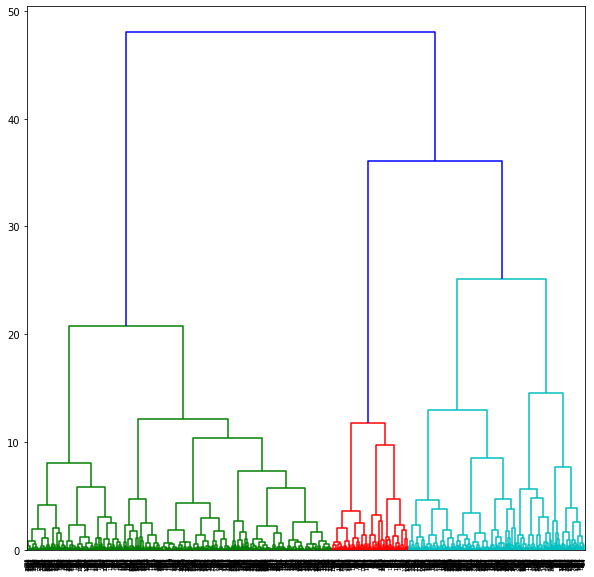

In [59]:
dendrog = sch.dendrogram(sch.linkage(input_std, method = 'ward', metric = 'euclidean'))
#se selecciono estas metricas por facilidad del clustering

Se puede observar que ocurre lo mismo que con la data normalizada, se realizara pruebas con ambos números de clusters: 2 y 3

In [60]:
plt.rc('figure', figsize = (5, 5))

In [61]:
from sklearn.cluster import AgglomerativeClustering
ac_std = AgglomerativeClustering(n_clusters = 2, linkage = 'ward', affinity = 'euclidean')

agg_cl_std = ac_std.fit_predict(input_std)
agg_cl_std
#ward: misminiza la varianza de los clusterings que se agrupan
#euclidean: como estamos utilizando ward, solo el valor euclidean es aceptado

array([1, 0, 1, ..., 0, 0, 0])

In [62]:
aux_cl_std = pd.DataFrame(agg_cl_std, columns = ['cl_agg_std'], index = input_std.index)
aux_cl_std

,cl_agg_std
0,1
1,0
2,1
3,0
4,1
...,...
1594,1
1595,0
1596,0
1597,0


In [63]:
df_wine_clust_std = pd.concat([df_wine_std, aux_cl_std], axis=1)

In [64]:
#observamos si hay vacios
df_wine_clust_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flg_quality_1         1599 non-null   float64
 1   flg_quality_2         1599 non-null   float64
 2   fixed_acidity         1599 non-null   float64
 3   volatile_acidity      1599 non-null   float64
 4   citric_acid           1599 non-null   float64
 5   residual_sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free_sulfur_dioxide   1599 non-null   float64
 8   total_sulfur_dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality               1599 non-null   float64
 14  newQuality            1599 non-null   float64
 15  total_acidity        

In [65]:
plt.rc('figure', figsize = (7, 7))

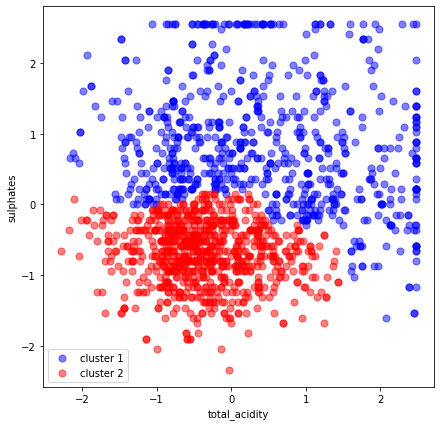

In [66]:
# Observar la naturaleza de las agrupaciones aglomerativas con la data normalizada
plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_agg_std'] == 0]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_agg_std'] == 0]['sulphates'],
            c = 'b', label = 'cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_agg_std'] == 1]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_agg_std'] == 1]['sulphates'],
            c = 'r', label = 'cluster 2',
            alpha = 0.5, s = 50)

plt.xlabel('total_acidity')
plt.ylabel('sulphates')
plt.legend(loc = 'best')

plt.show()

Con solo observar la imagen, sse parece un poco a la anterior obtenida en la seccion de normalización. Más los indices son diferentes, esto se debe a la forma en que se trato la información.

In [67]:
from sklearn.cluster import AgglomerativeClustering
ac_std__2 = AgglomerativeClustering(n_clusters = 3, linkage = 'ward', affinity = 'euclidean')

agg_cl_std_2 = ac_std__2.fit_predict(input_std)
agg_cl_std_2

array([1, 0, 1, ..., 0, 0, 0])

In [68]:
aux_cl_std_2 = pd.DataFrame(agg_cl_std_2, columns = ['cl_agg_std_2'], index = input_std.index)
aux_cl_std_2

,cl_agg_std_2
0,1
1,0
2,1
3,2
4,1
...,...
1594,1
1595,0
1596,0
1597,0


In [69]:

df_wine_clust_std = pd.concat([df_wine_clust_std, aux_cl_std_2], axis=1)

In [70]:
df_wine_clust_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flg_quality_1         1599 non-null   float64
 1   flg_quality_2         1599 non-null   float64
 2   fixed_acidity         1599 non-null   float64
 3   volatile_acidity      1599 non-null   float64
 4   citric_acid           1599 non-null   float64
 5   residual_sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free_sulfur_dioxide   1599 non-null   float64
 8   total_sulfur_dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality               1599 non-null   float64
 14  newQuality            1599 non-null   float64
 15  total_acidity        

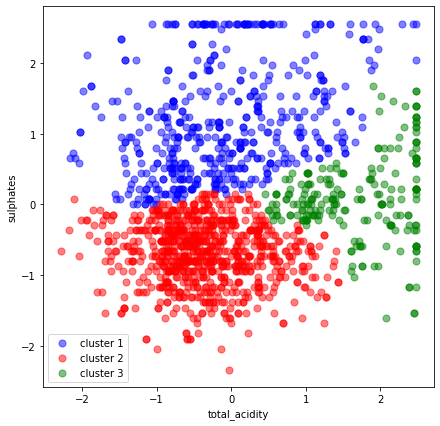

In [71]:
# Observar la naturaleza de las agrupaciones aglomerativas con la data normalizada
plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_agg_std_2'] == 0]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_agg_std_2'] == 0]['sulphates'],
            c = 'b', label = 'cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_agg_std_2'] == 1]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_agg_std_2'] == 1]['sulphates'],
            c = 'r', label = 'cluster 2',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_agg_std_2'] == 2]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_agg_std_2'] == 2]['sulphates'],
            c = 'g', label = 'cluster 3',
            alpha = 0.5, s = 50)

plt.xlabel('total_acidity')
plt.ylabel('sulphates')
plt.legend(loc = 'best')

plt.show()

##### K-means

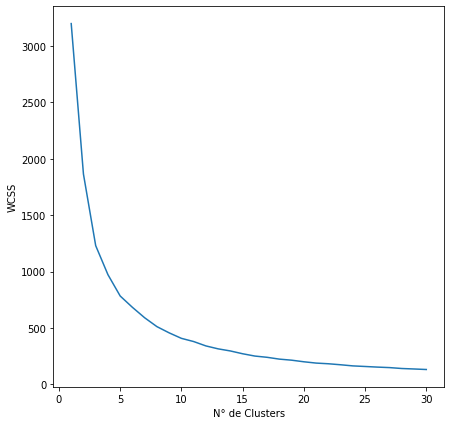

In [72]:
wcss= []
from sklearn.cluster import KMeans
for i in range(1, 31):
  km_std = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km_std.fit(input_std)
  wcss.append(km_std.inertia_)
  #print(str(i) + ' ' + str(km.inertia_))
#print(wcss)

# Graficando el Resultdo
plt.plot([*range(1, 31)], # Colocamos el eje X
         wcss) # Colocamos el eje Y
plt.xlabel('N° de Clusters')
plt.ylabel('WCSS')
plt.show()

Como se puede observar la curva aparece con 5 clusters. Con lo que por el momento se rechaza la hipotesis  3, debido a que el clustering aglomerativo y el k-means utilizan diferentes numeros de clusters, para este caso.

In [73]:
km_std = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km_cl_std = km_std.fit_predict(input_std)
km_cl_std

array([4, 3, 3, ..., 3, 3, 4], dtype=int32)

In [74]:
df_wine_clust_std = pd.concat([df_wine_clust_std,
                         pd.DataFrame(km_cl_std, columns = ['cl_k_mean_std'], index = input_std.index)], axis=1)

In [75]:
df_wine_clust_std.info()
#no hay vacios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flg_quality_1         1599 non-null   float64
 1   flg_quality_2         1599 non-null   float64
 2   fixed_acidity         1599 non-null   float64
 3   volatile_acidity      1599 non-null   float64
 4   citric_acid           1599 non-null   float64
 5   residual_sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free_sulfur_dioxide   1599 non-null   float64
 8   total_sulfur_dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality               1599 non-null   float64
 14  newQuality            1599 non-null   float64
 15  total_acidity        

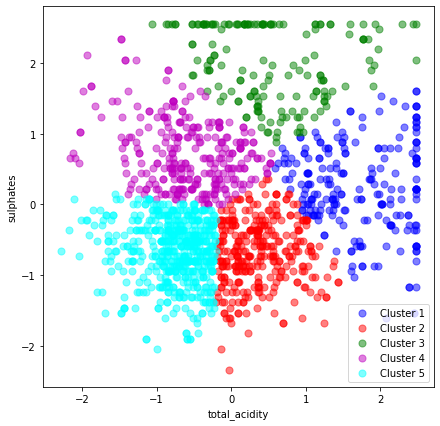

In [76]:
plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 0]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 0]['sulphates'],
            c = 'b', label = 'Cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 1]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 1]['sulphates'],
            c = 'r', label = 'Cluster 2',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 2]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 2]['sulphates'],
            c = 'g', label = 'Cluster 3',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 3]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 3]['sulphates'],
            c = 'm', label = 'Cluster 4',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 4]['total_acidity'],
            y = df_wine_clust_std[df_wine_clust_std['cl_k_mean_std'] == 4]['sulphates'],
            c = 'cyan', label = 'Cluster 5',
            alpha = 0.5, s = 50)

plt.xlabel('total_acidity')
plt.ylabel('sulphates')
plt.legend(loc = 'best')

plt.show()

Como se puede observar se obtiene un resultado diferente al obtenido en la anterior seccion, ahora el cluster 5 ( el de color celeste), es el que era el cluster 2. Más la forma obtenida es similar

##### Clustering DBSCAN

Como lo menciona la bibliografia, la data tiene 2 dimensiones por lo cual se tomara 4 como valor para MinPts.

In [77]:
#Obtencion del valor Eps
from sklearn.neighbors import NearestNeighbors
#n_neighbors es el valor de tu minPts
neighbors_std = NearestNeighbors(n_neighbors=4)
neighbors_fit_std = neighbors_std.fit(df_wine_std)
distances_std, indices_std = neighbors_fit_std.kneighbors(df_wine_std)


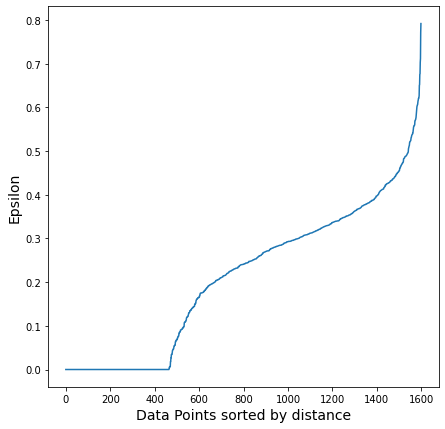

In [78]:
distances_std = np.sort(distances_std, axis=0)
distances_std = distances_std[:,1]
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.plot(distances)


como podemos observar hen la figura existen casi dos curvas uma para fuera u otra para adentro, hagamos la prueba con ambos valores.
en el primer codo el valor a tomar sera 1 y en el segundo 2.5

In [79]:
from sklearn.cluster import DBSCAN
dbscan_std=DBSCAN(eps=1.0,min_samples=4,metric='euclidean')
model = dbscan_std.fit_predict(input_std)

In [80]:
df['dbscan_nrm_labels']=dbscan_std.labels_
df['dbscan_nrm_labels'].value_counts()

0    1599
Name: dbscan_nrm_labels, dtype: int64

Al igual, que en el experimento anterior solo se obtiene un clusters, esto puede debers a que considera toda la data como ruido o, los puntos no estan muy separados, para realizar una buena clusterización

In [81]:
#se deja con los parametros por default por mayor facilidad del modelo
from sklearn.cluster import DBSCAN
dbscan_std_2=DBSCAN(eps=2.5,min_samples=4,metric='euclidean')
model = dbscan_std_2.fit_predict(input_std)

In [82]:
df['dbscan_nrm_labels']=dbscan_std_2.labels_
df['dbscan_nrm_labels'].value_counts()

0    1599
Name: dbscan_nrm_labels, dtype: int64

Sucede lo mismo que en el experimento anterior, en una seccion más adelante se realizará, una prueba con este clustering.

#### Comparación entre los modelos

Se compararan los resultados obtenidos por los datasets estandarizados y normalizados, tomando en cuenta los algoritmos aglomerativos y k-means. No se toma en consideración el dbscan debido a que no clusterizo los datasets ingresados. Cabe reclacar que los clusters se mencionan con el nombre que aparece como indice, es decir si hay 5 clusters, sus nombres seran 0,1,2,3,4

In [83]:
df_wine_clust_nrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flg_quality_1         1599 non-null   float64
 1   flg_quality_2         1599 non-null   float64
 2   fixed_acidity         1599 non-null   float64
 3   volatile_acidity      1599 non-null   float64
 4   citric_acid           1599 non-null   float64
 5   residual_sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free_sulfur_dioxide   1599 non-null   float64
 8   total_sulfur_dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality               1599 non-null   float64
 14  newQuality            1599 non-null   float64
 15  total_acidity        

In [84]:
#observar clustering aglomerativo data standarizada 2 clusters
df_wine_clust_nrm.groupby(['cl_agg_rnm']).agg({'residual_sugar': ['min', 'max',"mean"],'chlorides': ['min', 'max',"mean"],
                                               'alcohol': ['min', 'max',"mean"],'quality': ['min', 'max',"mean"],
                                               'sulphates': ['min', 'max',"mean"],'total_acidity': ['min', 'max',"mean"],
                                               'fixed_acidity': ['min', 'max',"mean"],'volatile_acidity': ['min', 'max',"mean"]})

residual_sugar                 ... volatile_acidity               
                      min  max      mean  ...              min  max      mean
cl_agg_rnm                                ...                                
0                0.109091  1.0  0.538182  ...         0.000000  1.0  0.386644
1                0.000000  1.0  0.499834  ...         0.044444  1.0  0.505581

[2 rows x 24 columns]

como podemos observar para el clustering aglomerativo de 2 variables, las variables que no fueron utilizadas para la clusterización, tienen valores cercanos con respecto a su promedio, con respecto a sus valores min y max, varias de las variables(discriminando a las que fueron ingresadas para realizar la agrupación) tienen valores maximos similares como quality , otro tienen valores maximos iguales como residual_sugar.

Con respecto a las variables ingresadas total_acidity tiene valores un poco similares en su promedio, asi como valores muy cercanos en sus metricas de min, max y mean.

Con respecto a la variable sulphates, podemos observar que sus valores minimos son similares, más los maximos son un poco diferentes siendo para el clustering 0: 1 y para el 1: 0.51. Con respecto a su promedio, se puede observar una gran diferencia entre ambos clusters,

Por ultimo, las variables utilizadas para crear total_acidity, poseen valores muy diferentes en sus promedios, lo que podría indicar que si esta realizando una buena clusterización, cuando se trata de esas variables. Más, esto se pone un poco en duda por que sus valores maximos y minimos son parecidos.

In [85]:
#aglomerativo con 3 clusters
df_wine_clust_nrm.groupby(['cl_agg_rnm_2']).agg({'residual_sugar': ['min', 'max',"mean"],'chlorides': ['min', 'max',"mean"],
                                               'alcohol': ['min', 'max',"mean"],'quality': ['min', 'max',"mean"],
                                               'sulphates': ['min', 'max',"mean"],'total_acidity': ['min', 'max',"mean"],
                                               'fixed_acidity': ['min', 'max',"mean"],'volatile_acidity': ['min', 'max',"mean"]})

residual_sugar                 ... volatile_acidity                    
                        min  max      mean  ...              min       max      mean
cl_agg_rnm_2                                ...                                     
0                  0.109091  1.0  0.507291  ...         0.000000  0.905556  0.383366
1                  0.000000  1.0  0.499834  ...         0.044444  1.000000  0.505581
2                  0.181818  1.0  0.609091  ...         0.066667  1.000000  0.394167

[3 rows x 24 columns]

como podemos observar para el clustering aglomerativo de 3 variables, las variables que no fueron utilizadas para la clusterización, tienen valores cercanos con respecto a su promedio, con respecto a sus valores min y max, varias de las variables(discriminando a las que fueron ingresadas para realizar la agrupación) tienen valores maximos similares como quality , otro tienen valores maximos iguales como residual_sugar. Asi mismo, se puede observar valores similares en sus promedios como se muestra en la variable chlorides,volatile_acidity.

Con respecto a las variables ingresadas total_acidity tiene dos valores iguales en su promedio y un valor similar (1.0 y 0.77), más sus valores de minimo y maximo son diferentes.

Con respecto a la variable sulphates, podemos observar que sus valores minimos y maximos son diferentes, tienen más diferencia entre cada uno de los clusters, si se compara con el aglomerativo de 2 clusters. Con respecto a su promedio, se puede observar una gran diferencia entre los tres clusters.

Si se compara este experimento con el aglomerativo de 2 clusters, se observa que este obtuvo una mejor separación de las características, debido a que la variable total_acidity no tenia mucha diferencia entre los promedios de sus dos clusters, más en este si se observa una diferencia entre el cluster 1,2 con el 3. Esto puede deberse, a que posiblemente se necesiten más clusters para realizar una clusterización más dedicada.

Con respecto a la variable sulphates si se puede observar una gran diferencia entre sus promedios  al igual que en el anterior caso, más al unir esta variable con total_acity se obtiene mucha mas información.

Asi mismo, los datos obtenidos, respaldan los graficos, debido a que podemos ver que ellos no poseen limites entre sus clusters muy definidos, en cambio estos estan muy pegados.

Hasta este momento, se decidio que el mejor agrupamiento es el aglomerativo con 3 clusters, faltaría observar como se comporta el k-means con este datasets, y si se obtienen resultados similares para estos clusterings con el dataset estandarizado.

In [86]:
df_wine_clust_nrm.groupby(['cl_k_mean_rnm']).agg({'residual_sugar': ['min', 'max',"mean"],'chlorides': ['min', 'max',"mean"],
                                               'alcohol': ['min', 'max',"mean"],'quality': ['min', 'max',"mean"],
                                               'sulphates': ['min', 'max',"mean"],'total_acidity': ['min', 'max',"mean"],
                                               'fixed_acidity': ['min', 'max',"mean"],'volatile_acidity': ['min', 'max',"mean"]})

residual_sugar       ... volatile_acidity          
                         min  max  ...              max      mean
cl_k_mean_rnm                      ...                           
0                   0.181818  1.0  ...         1.000000  0.371528
1                   0.000000  1.0  ...         1.000000  0.496283
2                   0.109091  1.0  ...         1.000000  0.520310
3                   0.145455  1.0  ...         0.855556  0.350440
4                   0.109091  1.0  ...         0.938889  0.406786

[5 rows x 24 columns]

como podemos observar para el k-means de 5 variables, las variables que no fueron utilizadas para la clusterización, tienen valores cercanos con respecto a su promedio, con respecto a sus valores min y max, varias de las variables(discriminando a las que fueron ingresadas para realizar la agrupación) tienen valores maximos similares como quality , otro tienen valores maximos iguales como residual_sugar. Asi mismo, se puede observar valores similares en sus promedios como se muestra en la variable chlorides,volatile_acidity. Con este  podemos observar que a diferencia de los anteriores experimentos, la información encada clusters es muy parecida.

Con respecto a las variables ingresadas total_acidity como promedio en sus 5 clusters: 0.84,0.31,0.56,0.59,0.36. Lo que nos hace ver, que el clustering no esta separando muy bien los valores, debido a que posee valores muy similares.

Con respecto a la variable sulphates, podemos observar que sus valores minimos y maximos son diferentes. Más conrespecto a su promedio, podemos observar dos valores muy cercados 0.343 y 0.340, los cuales pertenecen al clusterin con valor 1 y 2 (2 y 3 si se empieza a contar desde 1), más si observamos los promedios en total_acidity estos son 0.32 y 0.56. Asi mismo si se observa en esos dos clusters los valores maximo y minimo de total_acidity, nos damos cuenta que se discriminan entre si ya el cluster 1 tiene valor min:0 y maximo de 0.44, y el cluster 2 va desde 0.44 a 0.78; lo que indica que para esos valores de sulphato los valores de total_acidity se comporta diferente.
Más se puede observar que en los otros clustering sus minimos y maximos no son discriminantes. Por esta razon y por que muchas variables tienen valores muy parecidos como chlorides que todos sus valores maximos son 1, lo que nos indica que las variables utilizadas, más el algoritmo utilizado no ayuda a discriminar de forma correcta las otras variables. Por esta razón, con el dataset normalizado se decidio escojer el clustering aglomerativo con 3 clusters




A continuación, se procedera a realizar la misma comparación entre los algoritmos, pero utilizando data standarizada y el clustering elegido se comparara con el clustering aglomerativo de 3 cluster utilizando data normalizada. Para observar cual de los agrupamientos, obtiene una mejor separación entre los clusters obtenidos,

In [87]:
#dataset estandarizado
df_wine_clust_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flg_quality_1         1599 non-null   float64
 1   flg_quality_2         1599 non-null   float64
 2   fixed_acidity         1599 non-null   float64
 3   volatile_acidity      1599 non-null   float64
 4   citric_acid           1599 non-null   float64
 5   residual_sugar        1599 non-null   float64
 6   chlorides             1599 non-null   float64
 7   free_sulfur_dioxide   1599 non-null   float64
 8   total_sulfur_dioxide  1599 non-null   float64
 9   density               1599 non-null   float64
 10  pH                    1599 non-null   float64
 11  sulphates             1599 non-null   float64
 12  alcohol               1599 non-null   float64
 13  quality               1599 non-null   float64
 14  newQuality            1599 non-null   float64
 15  total_acidity        

In [88]:
#observar clustering aglomerativo data standarizada 2 clusters
df_wine_clust_std.groupby(['cl_agg_std']).agg({'residual_sugar': ['min', 'max',"mean"],'chlorides': ['min', 'max',"mean"],
                                               'alcohol': ['min', 'max',"mean"],'quality': ['min', 'max',"mean"],
                                               'sulphates': ['min', 'max',"mean"],'total_acidity': ['min', 'max',"mean"],
                                               'fixed_acidity': ['min', 'max',"mean"],'volatile_acidity': ['min', 'max',"mean"]})

residual_sugar            ... volatile_acidity          
                      min       max  ...              max      mean
cl_agg_std                           ...                           
0               -1.842037  2.178954  ...         2.833704 -0.335955
1               -2.334403  2.178954  ...         2.833704  0.278681

[2 rows x 24 columns]

Observando los valores maximos de las variables residual_sugar, chlorides, alcohol y volatile_acity, estos contienen valores casi iguales entre los dos clusters. Por ejemplo, volatile_acidity posee como valor maximo en sus dos clusters 2.833704. Lo que nos hace ver que las variables utilizadas, mas el algoritmo no nos ayuda a separar muy bien los clusters.

Así mismo, si observamos la variable total_acidity, este contiene valores muy similares en sus minimos siendo estos -2.16 y -2.28, más sus maxim9os si son muy diferentes siendo estos 2.48 y 1.42., obteniendo así un promedio de 0.433  y -0.36. Asi mismo, podemos observar que la variable sulphates tiene valores minimos y maximos muy diferentes, siendo estos [-1.60,2.56] para el cluster 0 y [-2.33,0.14] para el cluster 2,obteniendo como promedio 0.82 y -0.68, lo que nos indica que si realizo una buena clusterización si nos basamos solo en la variable sulphates. Más si vemos, todas las variables, no convence mucho a utilizar este agrupamiento.

In [89]:
#observar clustering aglomerativo data standarizada 2 clusters
df_wine_clust_std.groupby(['cl_agg_std_2']).agg({'residual_sugar': ['min', 'max',"mean"],'chlorides': ['min', 'max',"mean"],
                                               'alcohol': ['min', 'max',"mean"],'quality': ['min', 'max',"mean"],
                                               'sulphates': ['min', 'max',"mean"],'total_acidity': ['min', 'max',"mean"],
                                               'fixed_acidity': ['min', 'max',"mean"],'volatile_acidity': ['min', 'max',"mean"]})

residual_sugar            ... volatile_acidity          
                        min       max  ...              max      mean
cl_agg_std_2                           ...                           
0                 -1.842037  2.178954  ...         2.345641 -0.352891
1                 -2.334403  2.178954  ...         2.833704  0.278681
2                 -1.513793  2.178954  ...         2.833704 -0.297078

[3 rows x 24 columns]

Podemos observar que sucede lo mismo, con las variables que no fueron ingresadas a clusterizar, estas poseen valores maximos muy similares o iguales. Por ejemplo la variable residual sugar posee valores iguales en sus tres clusters siendo este 2.1789, con respecto a su promedio los cluster poseen valores un poco diferentes: -0.04, -0.08, 0.41. otro ejemplo es clorides que sus valores minimos en los clusters 0 y 1 son iguales: -2.31 al igual que sus maximos:2.178, dando como promedio -0.04 y 0.06, lo que indica que posee cantidades diferentes en cada uno de esos clusters.

con respecto a total_acidity posee valores iguales en el cluster 0 y 2 con respecto a su maximo : 2.4764, lo que indica que no se ha realizado una separación adecuada, y con respecto a sulophates podemos observar una mejor segmentacion que en total_acidity.

Asi mismo, podemos observar que el cluster q posee los mismos valores en su maximo, minimo y promedio para sulohates y total_acidity , que el cluster aglomerativo de 2 cluster. Por esta razon se decidio seleccionar el cluster aglomerativo de tres cluster, debido a que se observa una mejora en la clasificación, ya que el cluster nuevo formado del cluster 0 (si tomamos en cuenta el experimento anterior), posee valores diferentes en sus promedios

sulphates: 


*   cluster 0: 1.14
*   cluster 2: 1.10

total_acidity:
*   cluster 0: -0.11
*   cluster 2: 1.67

Apesar que los valores maximos de esos dos cluster para total_acidity sean el mismo (2.48), esto puede deberse al ruido que existe en la data, por eso es recomendable para trabajos futuros utilizar mas clusters para observar su comportamiento, o utilizar el algoritmo DBSCAN, el cual se observara cuando estemos en el segmento de la hipotesis 4



In [90]:
#k-means data estandarizada
df_wine_clust_std.groupby(['cl_k_mean_std']).agg({'residual_sugar': ['min', 'max',"mean"],'chlorides': ['min', 'max',"mean"],
                                               'alcohol': ['min', 'max',"mean"],'quality': ['min', 'max',"mean"],
                                               'sulphates': ['min', 'max',"mean"],'total_acidity': ['min', 'max',"mean"],
                                               'fixed_acidity': ['min', 'max',"mean"],'volatile_acidity': ['min', 'max',"mean"]})

residual_sugar            ... volatile_acidity          
                         min       max  ...              max      mean
cl_k_mean_std                           ...                           
0                  -1.513793  2.178954  ...         2.833704 -0.413851
1                  -1.842037  2.178954  ...         2.833704  0.346906
2                  -1.677915  2.178954  ...         2.087254 -0.519818
3                  -1.842037  2.178954  ...         2.517898 -0.221627
4                  -2.334403  2.178954  ...         2.833704  0.233885

[5 rows x 24 columns]

Podemos observar que en la variable residual_sugar todos sus valores maximos son los mismos (2.18), asi mismo podemos observar que la variable qualitiy en los clusters 0,1,2 sus valores minimos y maximos son los mismos,[-3.265,2.92]. Asi mismo, podemos observar que los promedios de dichas variables son muy cercanos, lo que nos indica que para ese variable no se ha realizado una buena segmenteación. Asi mismo podemos observar que la variable clorides, tiene valores maximos  iguales en todos sus clusters (2.18).

Con respecto, a las variables utilizadas para la clusterización, podemos observar que total_acidity posee valores similares con respecto a su promedio entre en sus clusters 0 y 2, siendo este 2.48. Así mismo podemos observar que el rango entre sus valores minismos y maximo entre sus cluster no son muy diferentes.

Con respecto a la variable sulphates, podemos observar que  no posee valores maximos , minimos y promedios iguales. Más sus valores en el cluster 1 y 4 son muy similares siendo estos (-0.68 y -0.67). 

Asi, mismo si comparamos los resultados de este cluster con el cluster aglomerativo de 3 clusters, podmeos observar que este cluster algunos de sus promedios son muy similares, como podemos observar en las variables total_acidity, y fixed_acidity, a pesar de que el número de cluster es mayor, lo que nos indica que con 5 cluster y kmeans no se  puede realizar una buena segmentación, se debería hacer mas pruebas aumentando o reduciendo el numeor de cluster para observar lo que esta sucediendo, por esta razon nos quedamos con el cluster aglomerativo de 3 clusters.

##Hipotesis 2: La variable free_sulphur dioxide y ph obtendran una clusterización diferente con el clustering elegido de la hipotesis 1

In [91]:
###cluster aglomerativa con data normalizada 
input_nrm = df_wine_nrm[['free_sulfur_dioxide',	'pH']]

In [92]:
plt.rc('figure', figsize = (10, 10))

Como en el anterior ejercicio, observamos que el mejor agruopamiento , fue el aglomerativo se hara dos experimentos con dicho algoritmo, se utilizara el mismo número de cluster utilizado y seleccionado, al momento de realizar las discusiones, para observar como se comportarían estas dos variables con la data estandarizada y normalizada, asi mismo es importante recordar que es recomendable el uso del dendograma para hallar el número optimo de clusters, más para este caso se utilizaran 3, para poder aceptar o rechazar la hipotesis.

---



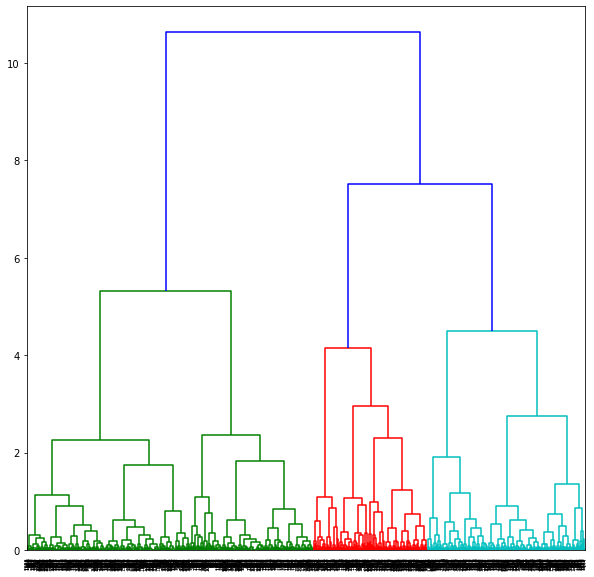

In [93]:
dendrog = sch.dendrogram(sch.linkage(input_nrm, method = 'ward', metric = 'euclidean'))


In [94]:
plt.rc('figure', figsize = (5, 5))

In [95]:
ac2_nrm_2 = AgglomerativeClustering(n_clusters = 3, linkage = 'ward', affinity = 'euclidean')

agg2_cl__nrm_2 = ac2_nrm_2.fit_predict(input_nrm)
agg2_cl__nrm_2

array([1, 2, 1, ..., 1, 2, 1])

In [96]:
aux2_cl_nrm_2 = pd.DataFrame(agg2_cl__nrm_2, columns = ['cl_agg2_nrm_2'], index = input_nrm.index)
aux2_cl_nrm_2

,cl_agg2_nrm_2
0,1
1,2
2,1
3,2
4,1
...,...
1594,2
1595,2
1596,1
1597,2


In [97]:
df_wine_clust_nrm = pd.concat([df_wine_clust_nrm, aux2_cl_nrm_2], axis=1)
df_wine_clust_nrm

,flg_quality_1,flg_quality_2,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,newQuality,total_acidity,cl_agg_rnm,cl_agg_rnm_2,cl_k_mean_rnm,cl_agg2_nrm_2
0,1.0,0.0,0.361290,0.644444,0.000000,0.363636,0.4500,0.243902,0.241379,0.709091,0.776316,0.343284,0.196078,0.4,0.0,0.386511,1,1,1,1
1,1.0,0.0,0.412903,0.844444,0.000000,0.618182,0.7250,0.585366,0.525862,0.618182,0.368421,0.522388,0.274510,0.4,0.0,0.461738,0,0,4,2
2,1.0,0.0,0.412903,0.711111,0.043956,0.509091,0.6500,0.341463,0.413793,0.636364,0.447368,0.477612,0.274510,0.4,0.0,0.446174,1,1,4,1
3,0.0,1.0,0.851613,0.177778,0.615385,0.363636,0.4375,0.390244,0.465517,0.727273,0.315789,0.373134,0.274510,0.6,0.5,0.824903,0,2,0,2
4,1.0,0.0,0.361290,0.644444,0.000000,0.363636,0.4500,0.243902,0.241379,0.709091,0.776316,0.343284,0.196078,0.4,0.0,0.386511,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,0.206452,0.533333,0.087912,0.400000,0.6250,0.756098,0.327586,0.445455,0.697368,0.373134,0.411765,0.4,0.0,0.217899,1,1,1,2
1595,0.0,1.0,0.167742,0.477778,0.109890,0.472727,0.2750,0.926829,0.387931,0.465455,0.789474,0.641791,0.549020,0.6,0.5,0.172503,0,0,4,2
1596,0.0,1.0,0.219355,0.433333,0.142857,0.509091,0.4500,0.682927,0.293103,0.521818,0.657895,0.626866,0.509804,0.6,0.5,0.219196,0,0,4,1
1597,1.0,0.0,0.167742,0.583333,0.131868,0.400000,0.4375,0.756098,0.327586,0.497273,0.855263,0.567164,0.352941,0.4,0.0,0.184825,0,0,4,2


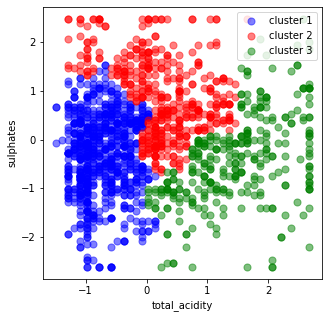

In [98]:
# Observar la naturaleza de las agrupaciones aglomerativas con la data normalizada

plt.scatter(x = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_nrm_2'] == 0]['free_sulfur_dioxide'],
            y = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_nrm_2'] == 0]['pH'],
            c = 'b', label = 'cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_nrm_2'] == 1]['free_sulfur_dioxide'],
            y = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_nrm_2'] == 1]['pH'],
            c = 'r', label = 'cluster 2',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_nrm_2'] == 2]['free_sulfur_dioxide'],
            y = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_nrm_2'] == 2]['pH'],
            c = 'g', label = 'cluster 3',
            alpha = 0.5, s = 50)

plt.xlabel('total_acidity')
plt.ylabel('sulphates')
plt.legend(loc = 'best')

plt.show()

Con solo observar el grafico, se observa un comportamiento similar al obtenido en la hipotesis 1.

In [99]:
input_std_2 = df_wine_std[['free_sulfur_dioxide',	'pH']]

Como se menciono anteriormente, se saltara la parte del dendograma

In [100]:
ac2_std_2 = AgglomerativeClustering(n_clusters = 3, linkage = 'ward', affinity = 'euclidean')

agg2_cl__std_2 = ac2_std_2.fit_predict(input_std_2)
agg2_cl__std_2

array([2, 0, 1, ..., 0, 0, 0])

In [101]:
aux2_cl_std_2 = pd.DataFrame(agg2_cl__std_2, columns = ['cl_agg2_std_2'], index = input_std.index)
aux2_cl_std_2

,cl_agg2_std_2
0,2
1,0
2,1
3,1
4,2
...,...
1594,0
1595,0
1596,0
1597,0


In [102]:
df_wine_clust_nrm = pd.concat([df_wine_clust_nrm, aux2_cl_std_2], axis=1)
df_wine_clust_nrm

,flg_quality_1,flg_quality_2,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,newQuality,total_acidity,cl_agg_rnm,cl_agg_rnm_2,cl_k_mean_rnm,cl_agg2_nrm_2,cl_agg2_std_2
0,1.0,0.0,0.361290,0.644444,0.000000,0.363636,0.4500,0.243902,0.241379,0.709091,0.776316,0.343284,0.196078,0.4,0.0,0.386511,1,1,1,1,2
1,1.0,0.0,0.412903,0.844444,0.000000,0.618182,0.7250,0.585366,0.525862,0.618182,0.368421,0.522388,0.274510,0.4,0.0,0.461738,0,0,4,2,0
2,1.0,0.0,0.412903,0.711111,0.043956,0.509091,0.6500,0.341463,0.413793,0.636364,0.447368,0.477612,0.274510,0.4,0.0,0.446174,1,1,4,1,1
3,0.0,1.0,0.851613,0.177778,0.615385,0.363636,0.4375,0.390244,0.465517,0.727273,0.315789,0.373134,0.274510,0.6,0.5,0.824903,0,2,0,2,1
4,1.0,0.0,0.361290,0.644444,0.000000,0.363636,0.4500,0.243902,0.241379,0.709091,0.776316,0.343284,0.196078,0.4,0.0,0.386511,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,0.206452,0.533333,0.087912,0.400000,0.6250,0.756098,0.327586,0.445455,0.697368,0.373134,0.411765,0.4,0.0,0.217899,1,1,1,2,0
1595,0.0,1.0,0.167742,0.477778,0.109890,0.472727,0.2750,0.926829,0.387931,0.465455,0.789474,0.641791,0.549020,0.6,0.5,0.172503,0,0,4,2,0
1596,0.0,1.0,0.219355,0.433333,0.142857,0.509091,0.4500,0.682927,0.293103,0.521818,0.657895,0.626866,0.509804,0.6,0.5,0.219196,0,0,4,1,0
1597,1.0,0.0,0.167742,0.583333,0.131868,0.400000,0.4375,0.756098,0.327586,0.497273,0.855263,0.567164,0.352941,0.4,0.0,0.184825,0,0,4,2,0


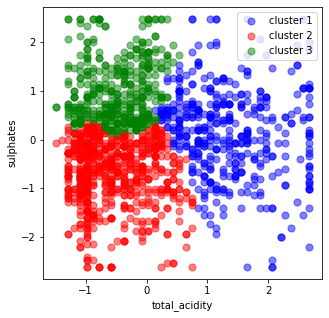

In [103]:
plt.scatter(x = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_std_2'] == 0]['free_sulfur_dioxide'],
            y = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_std_2'] == 0]['pH'],
            c = 'b', label = 'cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_std_2'] == 1]['free_sulfur_dioxide'],
            y = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_std_2'] == 1]['pH'],
            c = 'r', label = 'cluster 2',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_std_2'] == 2]['free_sulfur_dioxide'],
            y = df_wine_clust_std[df_wine_clust_nrm['cl_agg2_std_2'] == 2]['pH'],
            c = 'g', label = 'cluster 3',
            alpha = 0.5, s = 50)

plt.xlabel('total_acidity')
plt.ylabel('sulphates')
plt.legend(loc = 'best')

plt.show()

Se puede observar una gran concentración de puntos en los clusters 1 y 2, asi mismo, se observa que no existen limiyes definidos entre los tres clusters

###Discusiones


Cabe recalcar que los clusters, se nombran con los valores que salen en los indices, es decir si hay 5 clusters estos seran 0,1,2,3,4

In [104]:
df_wine_clust_nrm.groupby(['cl_agg2_nrm_2']).agg({'residual_sugar': ['min', 'max',"mean"],'chlorides': ['min', 'max',"mean"],
                                               'alcohol': ['min', 'max',"mean"],'quality': ['min', 'max',"mean"],
                                               'sulphates': ['min', 'max',"mean"],'total_acidity': ['min', 'max',"mean"],
                                               'pH': ['min', 'max',"mean"],'free_sulfur_dioxide': ['min', 'max',"mean"]})

residual_sugar       ... free_sulfur_dioxide          
                         min  max  ...                 max      mean
cl_agg2_nrm_2                      ...                              
0                   0.109091  1.0  ...            0.390244  0.186443
1                   0.109091  1.0  ...            0.756098  0.418798
2                   0.000000  1.0  ...            1.000000  0.707803

[3 rows x 24 columns]

Se puede observar que con respecto a la variable free_sulfur_dioxide, de ha realizado una buena segmentación debido a que sus promedios son muy diferentes, lo que indica que free_sulfur_dioxide es una buena variable para segmentear. Sus valores obtenidos en los tres clusters son: 8.64 en el cluster 0, 18.17 3 en el cluster 1 y 30.93 en el cluster 3.

Más si observamos los promedios de los valores de los clusters tomando en cuneta la variable ph, estos son 3.26 para el cluster 0, 3.45 para el cluster 1 y 3.25 para el cluster 2, lo que indica que no hay mucha diferencia en esta caracterisca.  Esto puede darse, debido a que los valores de ph son similares en los vinos, más si se une con la variable free_sulfur_dioxide podemos observar una gran mejoría, debido a que en ninguno de los anteriores experimentos se obtuvo resultados similares a los de free_sulfur_dioxide.

Si se debiera seleccionar entre el ejercicio aglomerativo de 3 clusters con data normalizada y las variables total_acidity , sulphates ; con este experimento, se tendría que tomar varias cosas en consideración, si se desea que ambas variables sean igual de importantes como podemos observar en el agrupamiento con total_acidity , sulphates, o que una de las dos variables tenga mas peso como este caso.

Como no soy experta en vino, en este caso se tomo como mejoró la segmentación por eso se considera que este experimento es mejor que el cluster aglomerativo de 3 clusters con data normalizada y las variables total_acidity , sulphates. Más para mejorarlo, sería recomendable realizar diferentes pruebas con otra variable que no sea pH, para observar como se comporta, ya que tal vez los resultados obtenidos se deben al utilizar pH y free_sulfur_dioxide como variables para el grupamiento.

Con lo cual aceptamos la hipotesis 2 para este caso

In [105]:
df_wine_clust_nrm.groupby(['cl_agg2_std_2']).agg({'residual_sugar': ['min', 'max',"mean"],'chlorides': ['min', 'max',"mean"],
                                               'alcohol': ['min', 'max',"mean"],'quality': ['min', 'max',"mean"],
                                               'sulphates': ['min', 'max',"mean"],'total_acidity': ['min', 'max',"mean"],
                                               'pH': ['min', 'max',"mean"],'free_sulfur_dioxide': ['min', 'max',"mean"]})

residual_sugar       ... free_sulfur_dioxide          
                         min  max  ...                 max      mean
cl_agg2_std_2                      ...                              
0                   0.000000  1.0  ...            1.000000  0.675308
1                   0.109091  1.0  ...            0.536585  0.226379
2                   0.109091  1.0  ...            0.487805  0.244103

[3 rows x 24 columns]

Se puede observar que los resulados de promedio h, son muy similares siendo estos 3.33 para el cluster 0, 3.21 para el cluster 1 y 3.45 para el cluster 2,sucede casi lo mismo en la variable free_sulfur_dioxide en el cluster 1 y 2 , en los que sus promedios son 10.28 y 11, más el promedio de su cluster 0 es 29.34. 

A diferencia del cluster aglomerativo de 3 clusters con data estandarizada y las variables total_acidity , sulphates, que en donde sus valores promedios son similares en sus tres clusters, por esta razon se elije este experimento, más sería recomendable probar otra variable diferente a pH, posiblemente encontremos una que nos ayude a realizar una mejor segmentación.

Se acepta la hipotesis 2

## Hipotesis 4: DBSCAN Clustering realizara un mejor agrupamiento con los datos que no han sido tratados por outlier, que con los que si han sido tratados.

Como se menciono en la teoría, DBSCAN clusteriza muy bien con ruido, y como observamos en la sección de hipotesis 1, solo se obtenía un cluster, se asumio que sucedía dicha situación debido a que con la normalización y estandarización se ponen los datos en la misma escala lo que ocasiona que el algoritmo no pueda diferenciar muy bien las distancias, asi mismo como se trato los outliers, el algoritmo considero posiblemente como ruido, la información tratada. Por esta razon en este caso se utilizara la data, tal cual la obtuvimos del dataset, para observar si los resultados varían, o el dbscan no es un algoritmo adecuado para este dataset


Se sigue utilizando Minpts = 4, como indica la teoria.

In [106]:
#Obtencion del valor Eps
from sklearn.neighbors import NearestNeighbors
#n_neighbors es el valor de tu minPts
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_wine)
distan, indices = neighbors_fit.kneighbors(df_wine)

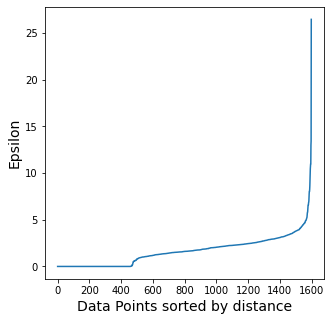

In [107]:
distances = np.sort(distan, axis=0)
distances = distances[:,1]
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.plot(distances)

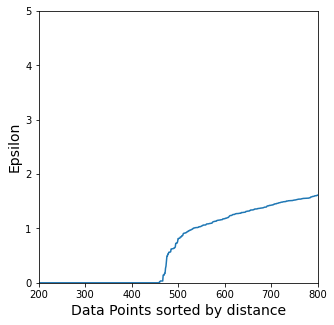

In [108]:

distances = np.sort(distan, axis=0)
distances = distances[:,1]
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.xlim(200,800)
plt.ylim(0,5)

plt.plot(distances)

Se puede observar que se obtiene un resultado resultado muy diferente, al que se obtuvo en la hipotesis 1, ya no exite dos barrigas pronunciadas, existe una chiquita y un codo. Para este caso se tomara como valor eps = 5 y eps = 1

Se utilizaran las variables total_acidity y sulphates

In [109]:
input_sinT = df_wine[['total_acidity',	'sulphates']]

In [110]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5.0,min_samples=4,metric='euclidean')
model = dbscan.fit_predict(input_sinT)

In [111]:
df['dbscan_labels']=dbscan.labels_
df['dbscan_labels'].value_counts()

0    1599
Name: dbscan_labels, dtype: int64

Podemos observar que se obtiene de nuevo una sola variable, lo que nos indica que con las variables ingresadas, es muy complicado realizar la segmentacion. Probemos con diferentes variables.

In [112]:
input_sinT = df_wine[['pH',	'free_sulfur_dioxide']]
dbscan=DBSCAN(eps=5.0,min_samples=4,metric='euclidean')
model = dbscan.fit_predict(input_sinT)
df['dbscan_labels']=dbscan.labels_
df['dbscan_labels'].value_counts()

0    1595
1       4
Name: dbscan_labels, dtype: int64

Podemos observar que con las variables utilizadas en la anterior sección se obtienen 2 clusters, aunque uno tiene 4 puntos.

Automatizemos el algoritmo para probar todas las variables en duplas.

In [113]:
a = list(df_wine.columns)
b = list(df_wine.columns)
i = 0

In [114]:
for col in a:
  i = 0
  for name in b:
    if(col != name):
      input_sinT = df_wine[[col,	name]]
      dbscan=DBSCAN(eps=5,min_samples=4,metric='euclidean')
      model = dbscan.fit_predict(input_sinT)
      df['dbscan_labels']=dbscan.labels_
      print("cols: [[ "+ col + " ," + name + "]]")
      print(df['dbscan_labels'].value_counts())

cols: [[ flg_quality_1 ,flg_quality_2]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,fixed_acidity]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,volatile_acidity]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,citric_acid]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,residual_sugar]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,chlorides]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,free_sulfur_dioxide]]
0    1595
1       4
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,total_sulfur_dioxide]]
 0    1595
-1       4
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,density]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,pH]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,sulphates]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,alcohol]]
0    1599
Name: dbscan_labels,

Podemos observar que se logra obtener 2 clusters con varias variables Ej:

*   [[ total_acidity ,free_sulfur_dioxide]]
*   [[ flg_quality_1 ,free_sulfur_dioxide]]
*   [[ flg_quality_2 ,free_sulfur_dioxide]]
*  [[ fixed_acidity ,free_sulfur_dioxide]]
*  [[ volatile_acidity ,free_sulfur_dioxide]]
*  [[ citric_acid ,free_sulfur_dioxide]]

Asi mismo con las varibales se obtiene un cluster y se identifica ruido(-1) referencia 17 ej:

*   [[ flg_quality_1 ,total_sulfur_dioxide]]
*   [[ flg_quality_2 ,total_sulfur_dioxide]]
*   [[ fixed_acidity ,total_sulfur_dioxide]]
*  [[ volatile_acidity ,total_sulfur_dioxide]]
*  [[ citric_acid ,total_sulfur_dioxide]]


Si utilizamos las variables:

*   [[ total_sulfur_dioxide ,free_sulfur_dioxide]] 5 clusters y uno de ruido
*   Elemento de lista


Con lo que podemos observar que si se utiliza cualquier otra variable con total_sulfur_oxide obtenemos un cluster y ruido, si utlizamos cualquier otra variable con free_sulfur_oxide obtenemos dos cluster, lo que nos indica que total_sulfur_oxide y free_sulfur_oxide nos stan ayudando a discriminar bien los clustering. Asi mismo observamos, que si utilizamos ambas variables obtenemos 5 clusters, con pocos puntos en cada uno de ellos y casi todos concentrados en el cluster 0, esto podría indicar que el eps utilizado no es muy recomendable.

Utilizemos el eps = 1 para observar que datos obtenemos




In [115]:
 for col in a:
  i = 0
  for name in b:
    if(col != name):
      input_sinT = df_wine[[col,	name]]
      dbscan=DBSCAN(eps=1,min_samples=4,metric='euclidean')
      model = dbscan.fit_predict(input_sinT)
      df['dbscan_labels']=dbscan.labels_
      print("cols: [[ "+ col + " ," + name + "]]")
      print(df['dbscan_labels'].value_counts())

cols: [[ flg_quality_1 ,flg_quality_2]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,fixed_acidity]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,volatile_acidity]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,citric_acid]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,residual_sugar]]
 0    1580
-1      11
 1       8
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,chlorides]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,free_sulfur_dioxide]]
 0    1572
 1      10
 2       6
-1       5
 4       3
 3       3
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,total_sulfur_dioxide]]
 0    1456
 4      28
 1      28
 6      17
 8      16
 5      16
 2      14
-1       8
 7       7
 3       5
 9       4
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,density]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,pH]]
0    1599
Name: dbsc

### Experimentos

Podemos observar que utilizando Eps 1, se obtienen mas clusters,  algunos de ellos tienen mas de 5 clusters, seleccionemos 5 de ellos para observar que tal estan divididos graficamente. Se selecciono algunos agrupaminetos que tenian menos de 10 clusters, debido a que más cluster ocasiona que hayan menos puntos en dichos clusters.


*   [[ citric_acid ,free_sulfur_dioxide]] 4 cluster y uno de ruido
*   [[ volatile_acidity ,free_sulfur_dioxide]] 5 clusters y uno de ruido
* [[ total_sulfur_dioxide ,quality]] 9 clusters y uno de ruido





##### Grafico  [[ citric_acid ,free_sulfur_dioxide]]

In [116]:
input_sinT = df_wine[[ 'citric_acid' ,'free_sulfur_dioxide']]
dbscan=DBSCAN(eps=1,min_samples=4,metric='euclidean')
model = dbscan.fit_predict(input_sinT)
df_wine['citricAcid_FreeSufur']=dbscan.labels_
df_wine['citricAcid_FreeSufur'].value_counts()

 0    1219
 1     343
-1      27
 2       6
 3       4
Name: citricAcid_FreeSufur, dtype: int64

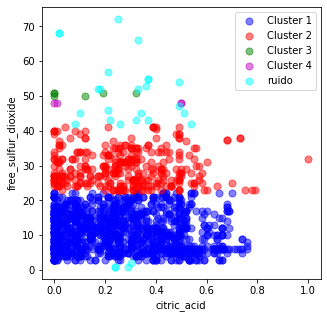

In [117]:
#grafico
plt.scatter(x = df_wine[df_wine['citricAcid_FreeSufur'] == 0]['citric_acid'],
            y = df_wine[df_wine['citricAcid_FreeSufur'] == 0]['free_sulfur_dioxide'],
            c = 'b', label = 'Cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['citricAcid_FreeSufur'] == 1]['citric_acid'],
            y = df_wine[df_wine['citricAcid_FreeSufur'] == 1]['free_sulfur_dioxide'],
            c = 'r', label = 'Cluster 2',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['citricAcid_FreeSufur'] == 2]['citric_acid'],
            y = df_wine[df_wine['citricAcid_FreeSufur'] == 2]['free_sulfur_dioxide'],
            c = 'g', label = 'Cluster 3',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['citricAcid_FreeSufur'] == 3]['citric_acid'],
            y = df_wine[df_wine['citricAcid_FreeSufur'] == 3]['free_sulfur_dioxide'],
            c = 'm', label = 'Cluster 4',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['citricAcid_FreeSufur'] == -1]['citric_acid'],
            y = df_wine[df_wine['citricAcid_FreeSufur'] == -1]['free_sulfur_dioxide'],
            c = 'cyan', label = 'ruido',
            alpha = 0.5, s = 50)

plt.xlabel('citric_acid')
plt.ylabel('free_sulfur_dioxide')
plt.legend(loc = 'best')

plt.show()

Se puede observar que el cluster rojo y azul estan bien determinados, mas el resto de clusters tiene puntos desperdigados.

In [118]:
df_wine.groupby(['citricAcid_FreeSufur']).agg({'citric_acid': ['min', 'max',"mean"],'free_sulfur_dioxide': ['min', 'max',"mean"]})

citric_acid        ... free_sulfur_dioxide           
                             min   max  ...                 max       mean
citricAcid_FreeSufur                    ...                               
-1                          0.02  0.54  ...                72.0  44.148148
 0                          0.00  0.76  ...                22.0  11.179245
 1                          0.00  1.00  ...                41.0  29.354227
 2                          0.00  0.32  ...                51.0  50.666667
 3                          0.00  0.50  ...                48.0  48.000000

[5 rows x 6 columns]

Podemos observar que el ruido es el que pose el mayor promedio siendo este 44.15, teniendo como maximo y minimo 1 y 72 respectivamente (en la variable free_sulfur_dioxide).

Asi mismo podemos observar que la varible free_sulfur_dioxide tiene promedios vuy variados entre sus cluster, por ejemplo cluster 0 tiene promedio 11 mientras que el cluster 1 29, el 2 51.6 y el 3 48.

Más si observamos la variable citric acid,esta posee promedios similares como podemos observar en el cluster 0 y 1 que poseeen 0.27. 

Se podria aceptar esta segmentación si se desea que free_sulfur_dioxide sea la más importante, asi mismo seria recomendabler observar como se comportan el resto de variables (vamores min, max y promedios)

#### [[ volatile_acidity ,free_sulfur_dioxide]]

In [119]:
input_sinT = df_wine[[ 'volatile_acidity' ,'free_sulfur_dioxide']]
dbscan=DBSCAN(eps=1,min_samples=4,metric='euclidean')
model = dbscan.fit_predict(input_sinT)
df_wine['volatilAcid_FreeSufur']=dbscan.labels_
df_wine['volatilAcid_FreeSufur'].value_counts()

 0    1549
-1      20
 2      14
 1       9
 4       4
 3       3
Name: volatilAcid_FreeSufur, dtype: int64

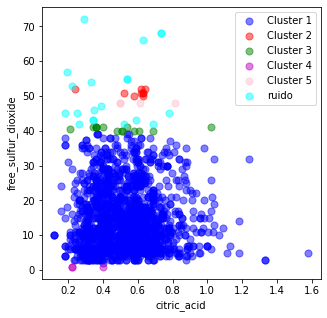

In [120]:
plt.scatter(x = df_wine[df_wine['volatilAcid_FreeSufur'] == 0]['volatile_acidity'],
            y = df_wine[df_wine['volatilAcid_FreeSufur'] == 0]['free_sulfur_dioxide'],
            c = 'b', label = 'Cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['volatilAcid_FreeSufur'] == 1]['volatile_acidity'],
            y = df_wine[df_wine['volatilAcid_FreeSufur'] == 1]['free_sulfur_dioxide'],
            c = 'r', label = 'Cluster 2',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['volatilAcid_FreeSufur'] == 2]['volatile_acidity'],
            y = df_wine[df_wine['volatilAcid_FreeSufur'] == 2]['free_sulfur_dioxide'],
            c = 'g', label = 'Cluster 3',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['volatilAcid_FreeSufur'] == 3]['volatile_acidity'],
            y = df_wine[df_wine['volatilAcid_FreeSufur'] == 3]['free_sulfur_dioxide'],
            c = 'm', label = 'Cluster 4',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['volatilAcid_FreeSufur'] == 4]['volatile_acidity'],
            y = df_wine[df_wine['volatilAcid_FreeSufur'] == 4]['free_sulfur_dioxide'],
            c = 'pink', label = 'Cluster 5',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['volatilAcid_FreeSufur'] == -1]['volatile_acidity'],
            y = df_wine[df_wine['volatilAcid_FreeSufur'] == -1]['free_sulfur_dioxide'],
            c = 'cyan', label = 'ruido',
            alpha = 0.5, s = 50)

plt.xlabel('citric_acid')
plt.ylabel('free_sulfur_dioxide')
plt.legend(loc = 'best')

plt.show()

Se observa que el cluster 1 es el que posee todos los puntos, y que el algunos punts de ruid son cercanos añ cluster verde y rojo.

In [121]:
df_wine.groupby(['citricAcid_FreeSufur']).agg({'volatile_acidity': ['min', 'max',"mean"],'free_sulfur_dioxide': ['min', 'max',"mean"]})

volatile_acidity         ... free_sulfur_dioxide           
                                  min    max  ...                 max       mean
citricAcid_FreeSufur                          ...                               
-1                               0.18  0.780  ...                72.0  44.148148
 0                               0.12  1.580  ...                22.0  11.179245
 1                               0.16  1.240  ...                41.0  29.354227
 2                               0.52  0.630  ...                51.0  50.666667
 3                               0.50  0.815  ...                48.0  48.000000

[5 rows x 6 columns]

podemos observar que la variable free_sulfur_dioxide tiene el mismo comportamiento que en el anterior experimento, con lo que podemos decir que esta no depende de la otra variable utilizada o que al no estar tratada la data y esta posee diferente escala a otras variables se le da mas importancia. Seria recomendable realizar un experimento con la data tratada para observar como se comporta.

Asi mismo podemos observar que volatile_acidity posee valores similares en todas las metricas como observamos en el anterior experimento.

#### [[ 'total_sulfur_dioxide' ,'quality']]

In [122]:
input_sinT = df_wine[[ 'total_sulfur_dioxide' ,'quality']]
dbscan=DBSCAN(eps=1,min_samples=4,metric='euclidean')
model = dbscan.fit_predict(input_sinT)
df_wine['totalSulfur_quality']=dbscan.labels_
df_wine['totalSulfur_quality'].value_counts()

 0    1452
 4      28
 1      24
 6      17
-1      16
 8      16
 5      16
 2      14
 7       7
 3       5
 9       4
Name: totalSulfur_quality, dtype: int64

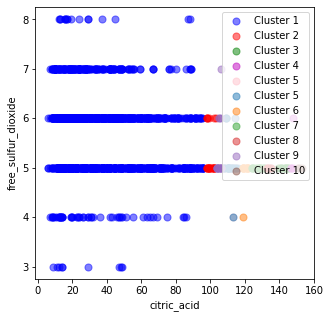

In [123]:
plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 0]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 0]['quality'],
            c = 'b', label = 'Cluster 1',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 1]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 1]['quality'],
            c = 'r', label = 'Cluster 2',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 2]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 2]['quality'],
            c = 'g', label = 'Cluster 3',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 3]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 3]['quality'],
            c = 'm', label = 'Cluster 4',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 4]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 4]['quality'],
            c = 'pink', label = 'Cluster 5',
            alpha = 0.5, s = 50)
plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 4]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 4]['quality'],
            label = 'Cluster 5',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 5]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 5]['quality'],
            label = 'Cluster 6',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 6]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 6]['quality'],
            label = 'Cluster 7',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 7]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 7]['quality'],
            label = 'Cluster 8',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 8]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 8]['quality'],
            label = 'Cluster 9',
            alpha = 0.5, s = 50)

plt.scatter(x = df_wine[df_wine['totalSulfur_quality'] == 9]['total_sulfur_dioxide'],
            y = df_wine[df_wine['totalSulfur_quality'] == 9]['quality'],
            label = 'Cluster 10',
            alpha = 0.5, s = 50)

plt.xlabel('citric_acid')
plt.ylabel('free_sulfur_dioxide')
plt.legend(loc = 'best')

plt.show()

Podemos observar un gran cambio en el comportamientyo de los clusters. Observemos sus metricas, para ver como se comportan entas.

In [124]:
df_wine.groupby(['totalSulfur_quality']).agg({'total_sulfur_dioxide': ['min', 'max',"mean"],'quality': ['min', 'max',"mean"]})

total_sulfur_dioxide         ... quality          
                                     min    max  ...     max      mean
totalSulfur_quality                              ...                  
-1                                  16.0  289.0  ...     8.0  6.437500
 0                                   6.0   96.0  ...     8.0  5.674931
 1                                  98.0  103.0  ...     6.0  5.250000
 2                                 139.0  145.0  ...     5.0  5.000000
 3                                 147.0  148.0  ...     6.0  5.200000
 4                                 108.0  116.0  ...     6.0  5.107143
 5                                 119.0  122.0  ...     5.0  4.937500
 6                                 124.0  131.0  ...     5.0  5.000000
 7                                 133.0  135.0  ...     5.0  5.000000
 8                                 104.0  106.0  ...     7.0  5.312500
 9                                 151.0  153.0  ...     5.0  5.000000

[11 rows x 6 columns]

Podemos observar que se obtienen  valores similares en sus promedios, en este caso en la variable quality, estos estan alrededor de 5. Asi mismo si observamos la variable total_sulfur_dioxide esta posee valores distante en sus promedios con respecto a algunos de sus clusters por ejemplo el cluster 0 posee un promedio de 39 y el cluster 1 de 99.92. Asi mismo otras clusters poseen valores un poco cercanos en sus promedios como lo es el cluster 4 con 111.25 y el cluster 8 con 105.1

Sería recomendable realizar el mismo experimento con la data tratada, a continuación se volvera a realizar el experimento con data tratada con normalización y con data tratada con normalización y outliers para observar como se comportan estos agrupamientos. 

Más observando solo los graficos anteriores, podemos decir que la que separa mejor es el primer cluster y este cluster. Mientras que el primero sigue mostrando las formas obtenidas en los anteriores experimentos podmos observar una cierta forma en el cluster rojo y azul. Asi mismo en este ultimo cluster podemos observar que  presentan otra forma al agruparse, y que los otros  clusters a parecen cuando el anterior acaba, es decir tiene una agrupación lineal secuencial, lo que nos permite observar otro tipo de agrupación y observar mejor los limietes de estos.

### DBSCAN con data normalizada

In [125]:
nm = MinMaxScaler()
df_wine_dbscan_nrm = pd.DataFrame(nm.fit_transform(df_wineBackUp), columns = list(df_wineBackUp.columns))
df_wine_dbscan_nrm

,flg_quality_1,flg_quality_2,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,newQuality,total_acidity,citricAcid_FreeSufur,volatilAcid_FreeSufur,totalSulfur_quality
0,1.0,0.0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0,0.266906,0.25,0.2,0.1
1,1.0,0.0,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,0.0,0.318854,0.50,0.2,0.1
2,1.0,0.0,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,0.0,0.308106,0.25,0.2,0.1
3,0.0,1.0,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,0.5,0.569637,0.25,0.2,0.1
4,1.0,0.0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0.0,0.266906,0.25,0.2,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.0,0.0,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4,0.0,0.150470,0.50,0.2,0.1
1595,0.0,1.0,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6,0.5,0.119122,0.50,0.2,0.1
1596,0.0,1.0,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6,0.5,0.151366,0.50,0.2,0.1
1597,1.0,0.0,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4,0.0,0.127631,0.50,0.2,0.1


In [126]:
df_wine_dbscan_nrm_bp = df_wine_dbscan_nrm.copy()

##### Grafico  [[ citric_acid ,free_sulfur_dioxide]]

In [127]:
input_conT = df_wine_dbscan_nrm[[ 'citric_acid' ,'free_sulfur_dioxide']]
dbscan_conT=DBSCAN(eps=5,min_samples=4,metric='euclidean')
model = dbscan_conT.fit_predict(input_conT)
df_wine_dbscan_nrm['citricAcid_FreeSufur_5']=dbscan_conT.labels_
df_wine_dbscan_nrm['citricAcid_FreeSufur_5'].value_counts()

0    1599
Name: citricAcid_FreeSufur_5, dtype: int64

In [128]:
input_conT = df_wine_dbscan_nrm[[ 'citric_acid' ,'free_sulfur_dioxide']]
dbscan_conT=DBSCAN(eps=1,min_samples=4,metric='euclidean')
model = dbscan_conT.fit_predict(input_conT)
df_wine_dbscan_nrm['citricAcid_FreeSufur_1']=dbscan_conT.labels_
df_wine_dbscan_nrm['citricAcid_FreeSufur_1'].value_counts()

0    1599
Name: citricAcid_FreeSufur_1, dtype: int64

Podemos observar que al tratarla dejamos de obtener los clusters que teniamos en la anterior sección.

#### [[ volatile_acidity ,free_sulfur_dioxide]]

In [129]:
input_conT = df_wine_dbscan_nrm[[ 'volatile_acidity' ,'free_sulfur_dioxide']]
dbscan_conT=DBSCAN(eps=5,min_samples=4,metric='euclidean')
model = dbscan_conT.fit_predict(input_conT)
df_wine_dbscan_nrm['volatilAcid_FreeSufur_5']=dbscan_conT.labels_
df_wine_dbscan_nrm['volatilAcid_FreeSufur_5'].value_counts()

0    1599
Name: volatilAcid_FreeSufur_5, dtype: int64

In [130]:
input_conT = df_wine_dbscan_nrm[[ 'volatile_acidity' ,'free_sulfur_dioxide']]
dbscan_conT=DBSCAN(eps=1,min_samples=4,metric='euclidean')
model = dbscan_conT.fit_predict(input_conT)
df_wine_dbscan_nrm['volatilAcid_FreeSufur_1']=dbscan_conT.labels_
df_wine_dbscan_nrm['volatilAcid_FreeSufur_1'].value_counts()

0    1599
Name: volatilAcid_FreeSufur_1, dtype: int64

Podemos observar que ocurre lo mismo, volvemos a obtener solo un cluster. 

#### [[ 'total_sulfur_dioxide' ,'quality']]

In [131]:
input_conT = df_wine_dbscan_nrm[[ 'total_sulfur_dioxide' ,'quality']]
dbscan_conT=DBSCAN(eps=5,min_samples=4,metric='euclidean')
model = dbscan_conT.fit_predict(input_conT)
df_wine_dbscan_nrm['totalSulfur_quality_5']=dbscan_conT.labels_
df_wine_dbscan_nrm['totalSulfur_quality_5'].value_counts()

0    1599
Name: totalSulfur_quality_5, dtype: int64

In [132]:
input_conT = df_wine_dbscan_nrm[[ 'total_sulfur_dioxide' ,'quality']]
dbscan_conT=DBSCAN(eps=1,min_samples=4,metric='euclidean')
model = dbscan_conT.fit_predict(input_conT)
df_wine_dbscan_nrm['totalSulfur_quality_1']=dbscan_conT.labels_
df_wine_dbscan_nrm['totalSulfur_quality_1'].value_counts()

0    1599
Name: totalSulfur_quality_1, dtype: int64

Podemos observar de nuevo que solo obtenemos un cluster. Se puede asumir que el algoritmo no funciona bien cuando la data esta tratada para poner todos los valores a una misma escala. Trartemos probando si sucede lo mismo con todas las variables

####Automatizando para obtener num cluster con todas las variables

In [133]:
df_wine_dbscan_nrm_Aut = df_wine_dbscan_nrm_bp.copy()

Por motivos de simplificar el resultado se utilizara eps = 1

In [134]:
for col in a:
  i = 0
  for name in b:
    if(col != name):
      input_conT = df_wine_dbscan_nrm_Aut[[col,	name]]
      dbscan=DBSCAN(eps=1,min_samples=4,metric='euclidean')
      model = dbscan.fit_predict(input_conT)
      df['dbscan_labels']=dbscan.labels_
      print("cols: [[ "+ col + " ," + name + "]]")
      print(df['dbscan_labels'].value_counts())

cols: [[ flg_quality_1 ,flg_quality_2]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,fixed_acidity]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,volatile_acidity]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,citric_acid]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,residual_sugar]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,chlorides]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,free_sulfur_dioxide]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,total_sulfur_dioxide]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,density]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,pH]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,sulphates]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,alcohol]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[

Podemos observar que se obtienen solo un cluster para el resto de las variables y si observamos dos clusters es debido a que se estan agrupando con variables que dan la misma información como newquality y flg_quality_2.

No se eliminaron dichas variables, debido a que se  querian hacer diferentes experimentos con dichas variables, más habria sido necesario eliminar la variable new_quality para quedarnos solo con las dummy variables que se obtienen gracias a ella.

###Automatización data normalizada con tratamiento de outliers

In [135]:
for col in a:
  i = 0
  for name in b:
    if(col != name):
      input_con2T = df_wine_nrm[[col,	name]]
      dbscan=DBSCAN(eps=1,min_samples=4,metric='euclidean')
      model = dbscan.fit_predict(input_con2T)
      df['dbscan_labels']=dbscan.labels_
      print("cols: [[ "+ col + " ," + name + "]]")
      print(df['dbscan_labels'].value_counts())

cols: [[ flg_quality_1 ,flg_quality_2]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,fixed_acidity]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,volatile_acidity]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,citric_acid]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,residual_sugar]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,chlorides]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,free_sulfur_dioxide]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,total_sulfur_dioxide]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,density]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,pH]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,sulphates]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[ flg_quality_1 ,alcohol]]
0    1599
Name: dbscan_labels, dtype: int64
cols: [[

Podemos observar que ocurre lo mismo que con el data set que solo tenia data normalizada, con lo cual podemos decir que para este dataset, el algoritmo DBSCAN considerara que todos los puntos son un solo cluster, si la data ha sido tratada con anticipación

Sería interesante observar si esto sucedería con otro  dataset, o solo ocurre en este caso.

# Conclusiones


Con respecto a los experimentos realizados se puede concluir que se debe conocer bien la data que uno esta utilizando debido a que con el conocimiento adecuado se pueden crear nuevas variables o saber cuales variables utilizar para el agrupamiento, o cuales otras no son lo suficientemente relevantes para tomarlas en cuenta. Como en este caso, que se encontro informaión que total_acidity se obtiene de realizar una suma de los tipos de acido que contiene el vino asi como que el fixed_acidity esta compuesto por acidos citricos, variable la cual no fue considerada en la suma por la definición antes mencionada.



Con respecto al tratamiento de datos se debe tener en cuenta con que algoritmo se esta trabajando debido a como vimos no hay problema en estandarizar los datos y tratar los outliers cuando se va a utilizar los clusterings aglomerativos y k-means. Más si se utiliza dicho tipo de datos en el DBSCAN podemos observarque no realiza una buena agrupación, es decir considera todos los puntos como un solo cluster como pudimos observar en la hipotesis 1 y en la hipotesis 4.

Con respecto a la hipotesis 1, cuando comparamos los algoritmos que utlizaro datos normalizados y los que utilizaron datos estandarizados entre si, se selecciono el algoritmo aglomerativo con 3 clustersa en ambos casos, mas tambien se pudo haber seleccionado el K-means, debido a que no tenian mucha diferencia entre sus resultados. Asi mismo, sería interesante observar los resultados de los agrupamientos si se da valores optimos a todos sus parametros, lo cual se puede obtener utilizando grid search, el cual te permite obtener con que conjunto de valores el algoritmo obtiene su mejor comportamiento.   

Con respecto a la hipotesis 2, donde se utiliza un nuevo conjunto de variables con el resultado obtenido de la hipotesis 1,se pudo observar que tuvo un mejor comportamiento que la hipotesis 1, más habria sido interesante observar esas variables con otros modelos.

Finalmente con respecto a la hipotesis 4, pudimos observar que el DBSCAN  da mejores resultados cuando el dataset no ha sido tratado, como se observo se utilizaron ciertas variables, las cuales fueron seleccionadas debdo a su numero de clusters que obtenia para observar como se comportaban. Más si se le ingresa datos tratados este deja de dar resultados esperados, esto podría deberse a que no se han utilizado los parametros adecuados para el algoritmo o que este no realiza muy bien el agrupamiento si los datos estan en la misma escal.

Para terminar las hipotesis que fueron aceptadas son:

*   Hipotesis 1
*   Hipotesis 2
* Hipotesis 4

y se rechaza las:

*  Hipotesis 3
*  Hipotesis 5





### Referencias





Referencias Bussiness Understanding

1.   https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/winery-lab-techniques/titratable-acidity
2.   https://rstudio-pubs-static.s3.amazonaws.com/57835_c4ace81da9dc45438ad0c286bcbb4224.html
3. https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity
4. https://www.randoxfood.com/why-is-testing-for-tartaric-acid-important-in-wine-making/
5. https://winemakersacademy.com/understanding-wine-acidity/  (menciona que sumando el fixed y volatile acid, obtienes el acido total del vino)
6. https://www.decanter.com/learn/residual-sugar-46007/
7. https://winemakermag.com/technique/501-measuring-residual-sugar-techniques
8. https://mantech-inc.com/wp-content/uploads/2014/07/105-Chloride-in-Wine-by-Titration.pdf
9. https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/
10.http://winemakersacademy.com/importance-ph-wine-making/
11 https://www.thespruceeats.com/what-are-wine-sulfites-3511277


Referencia Tratamiento de Outliers

1. https://www.youtube.com/watch?v=P8ls1Wjmpkw&ab_channel=RocioChavezCienciadeDatos

Referencias DBSCAN Clustering
1. https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556
2. https://developers.google.com/machine-learning/clustering/clustering-algorithms
3. https://www.javatpoint.com/clustering-in-machine-learning
4. https://pro.arcgis.com/es/pro-app/latest/tool-reference/spatial-statistics/how-density-based-clustering-works.htm
5. https://elvex.ugr.es/idbis/dm/slides/43%20Clustering%20-%20Density.pdf
6. https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html
7. https://blog.dominodatalab.com/topology-and-density-based-clustering
8. Rehman, S. U., Asghar, S., Fong, S., & Sarasvady, S. (2014). DBSCAN: Past, present and future. The Fifth International Conference on the Applications of Digital Information and Web Technologies (ICADIWT 2014). doi:10.1109/icadiwt.2014.6814687
9. Tran, T. N., Drab, K., & Daszykowski, M. (2013). Revised DBSCAN algorithm to cluster data with dense adjacent clusters. Chemometrics and Intelligent Laboratory Systems, 120, 92–96. doi:10.1016/j.chemolab.2012.11.00
10. https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
11. https://www.youtube.com/watch?v=C3r7tGRe2eI&ab_channel=KrishNaik
12. Martin Ester, Hans-Peter Kriegel, Jörg Sander, and Xiaowei Xu. 1996. A density-based algorithm for discovering clusters in large spatial databases with noise. In Proceedings of the Second International Conference on Knowledge Discovery and Data Mining (KDD'96). AAAI Press, 226–231.
13. https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd
14. Sander, J., Ester, M., Kriegel, HP. et al. Density-Based Clustering in Spatial Databases: The Algorithm GDBSCAN and Its Applications. Data Mining and Knowledge Discovery 2, 169–194 (1998).
15. http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/
16. https://stats.stackexchange.com/questions/326823/scikit-learns-dbscan-unable-to-cluster-toy-data-sets
17. https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
18.https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html




